#Estimation of Obesity Levels in Individuals from Mexico, Peru, and Colombia Based on Eating Habits and Physical Condition through Machine Learning Approach

##1.Project Overview

The project aims to estimate obesity levels in individuals from Mexico, Peru, and Colombia by analyzing their eating habits and physical conditions. This dataset is particularly valuable for health and medical research, offering insights into the factors influencing obesity across different demographics and lifestyle choices in these regions. The dataset includes 2111 records and 16 features, covering a range of variables such as dietary habits, physical activity, and other lifestyle factors. The primary goal is to classify obesity levels into categories like Insufficient Weight, Normal Weight, Overweight Levels I and II, and Obesity Types I, II, and III.



##2.Data Information

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

- **Gender**: Categorical variable indicating the gender of the individual.
- **Age**: Continuous variable representing the age of the individual.
- **Height**: Continuous variable for the height of the individual.
- **Weight**: Continuous variable for the weight of the individual.
- **Family_history_with_overweight**: Binary variable indicating if a family member has suffered or suffers from overweight.
- **FAVC**: Binary variable that indicates if the individual frequently eats high-caloric food.
- **FCVC**: Integer variable showing the frequency of vegetable consumption in meals.
- **NCP**: Continuous variable for the number of main meals consumed daily.
- **CAEC**: Categorical variable indicating if the individual eats any food between meals.
- **SMOKE**: Binary variable indicating whether the individual smokes.
- **CH2O**: Continuous variable showing the daily water intake.
- **SCC**: Binary variable indicating if the individual monitors their calorie intake.
- **FAF**: Continuous variable representing the frequency of physical activity.
- **TUE**: Integer variable measuring the amount of time spent using technological devices.
- **CALC**: Categorical variable indicating the frequency of alcohol consumption.
- **MTRANS**: Categorical variable specifying the primary mode of transportation used by the individual.
- **NObesity**: Target categorical variable classifying the obesity level of the individual (Insufficient Weight, Normal Weight, Overweight Levels I and II, Obesity Types I, II, and III).



##3.Data Inspecting and Preprocessing

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.8 MB/s eta 0:00:00


In [2]:
!pip install logitboost

In [3]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 10.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [7]:
# Concatenates X and y into the DataFrames
df = pd.concat([X, y], axis=1)

# Display the first few rows of the combined DataFrame
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [8]:
# Check its rows and columns
df.shape

(2111, 17)

In [9]:
# Check its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
df.describe().T

count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00

In [11]:
# Check its missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
# Check its duplication
df.duplicated().sum()

24

In [13]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [14]:
df['NObeyesdad']

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [15]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [16]:
# Checking the uniqueness of each column in the dataset 'df'
unique_counts = df.nunique()

# Displaying the unique counts for each column
unique_counts

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

#### Categorical's Uniqueness

In [17]:
# Selecting all categorical columns in the dataset
df.select_dtypes(include=['object']).columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [18]:
# Selecting all categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating lists to store categorical variable, uniqueness count, and detailed uniqueness names with their counts
categorical_variable = []
uniqueness_count = []
uniqueness_details = []

# Populating the lists with relevant information and counts of each unique value for categorical columns
for col in categorical_columns:
    categorical_variable.append(col)
    uniqueness_count.append(df[col].nunique())
    value_counts = df[col].value_counts()
    # Formatting unique values with their counts
    uniqueness_details.append(', '.join([f"{val} ({count})" for val, count in value_counts.items()]))

# Creating a DataFrame with the desired information
uniqueness_summary_table = pd.DataFrame({
    'Categorical Variable': categorical_variable,
    'Uniqueness Count': uniqueness_count,
    'Uniqueness Details': uniqueness_details
})

# Displaying the table
uniqueness_summary_table

Categorical Variable  Uniqueness Count  \
0                          Gender                 2   
1  family_history_with_overweight                 2   
2                            FAVC                 2   
3                            CAEC                 4   
4                           SMOKE                 2   
5                             SCC                 2   
6                            CALC                 4   
7                          MTRANS                 5   
8                      NObeyesdad                 7   

                                  Uniqueness Details  
0                         Male (1068), Female (1043)  
1                               yes (1726), no (385)  
2                               yes (1866), no (245)  
3  Sometimes (1765), Frequently (242), Always (53...  
4                                no (2067), yes (44)  
5                                no (2015), yes (96)  
6  Sometimes (1401), no (639), Frequently (70), A...  
7  Public_Transportation (1580), Automobile (457)...  
8  Obesity_Type_I (351), Obesity_Type_III (324), ...

#####Uniqueness Details

In [19]:
# Displaying the full content of the 'Uniqueness Details' column to ensure all data is visible
pd.set_option('display.max_colwidth', None)  # Setting display option to show all content in cells

# Displaying the 'Uniqueness Details' column from the uniqueness summary table
uniqueness_summary_table['Uniqueness Details']

0                                                                                                                                                  Male (1068), Female (1043)
1                                                                                                                                                        yes (1726), no (385)
2                                                                                                                                                        yes (1866), no (245)
3                                                                                                                    Sometimes (1765), Frequently (242), Always (53), no (51)
4                                                                                                                                                         no (2067), yes (44)
5                                                                                                                                                         no (2015), yes (96)
6                                                                                                                     Sometimes (1401), no (639), Frequently (70), Always (1)
7                                                                                      Public_Transportation (1580), Automobile (457), Walking (56), Motorbike (11), Bike (7)
8    Obesity_Type_I (351), Obesity_Type_III (324), Obesity_Type_II (297), Overweight_Level_I (290), Overweight_Level_II (290), Normal_Weight (287), Insufficient_Weight (272)
Name: Uniqueness Details, dtype: object

##4.Exploratory Data Analysis (EDA)

###Gender

In [20]:
# Counting the occurrences of each gender in the dataset
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

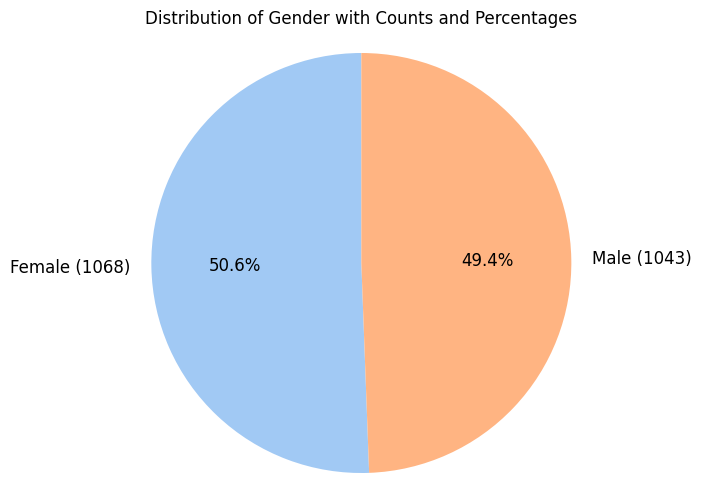

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the occurrences of each gender in the dataset
gender_counts = df['Gender'].value_counts()

# Mapping the encoded values to their labels (assuming 0 = Female, 1 = Male)
gender_labels = ['Female', 'Male']

# Plotting the pie chart with counts and percentages
plt.figure(figsize=(8, 6))
plt.pie(
    gender_counts,
    labels=[f"{label} ({count})" for label, count in zip(gender_labels, gender_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of Gender with Counts and Percentages')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [22]:
# Creating a cross-tabulation table of counts for 'Gender' against 'NObeyesdad'
gender_nobeyesdad_counts = pd.crosstab(df['Gender'], df['NObeyesdad'])

# Creating a DataFrame to display the counts in a clear format
gender_nobeyesdad_counts_table = gender_nobeyesdad_counts.reset_index()

# Displaying the cross-tabulation table
gender_nobeyesdad_counts_table

NObeyesdad  Gender  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
0           Female                  173            141             156   
1             Male                   99            146             195   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
0                         2               323                 145   
1                       295                 1                 145   

NObeyesdad  Overweight_Level_II  
0                           103  
1                           187

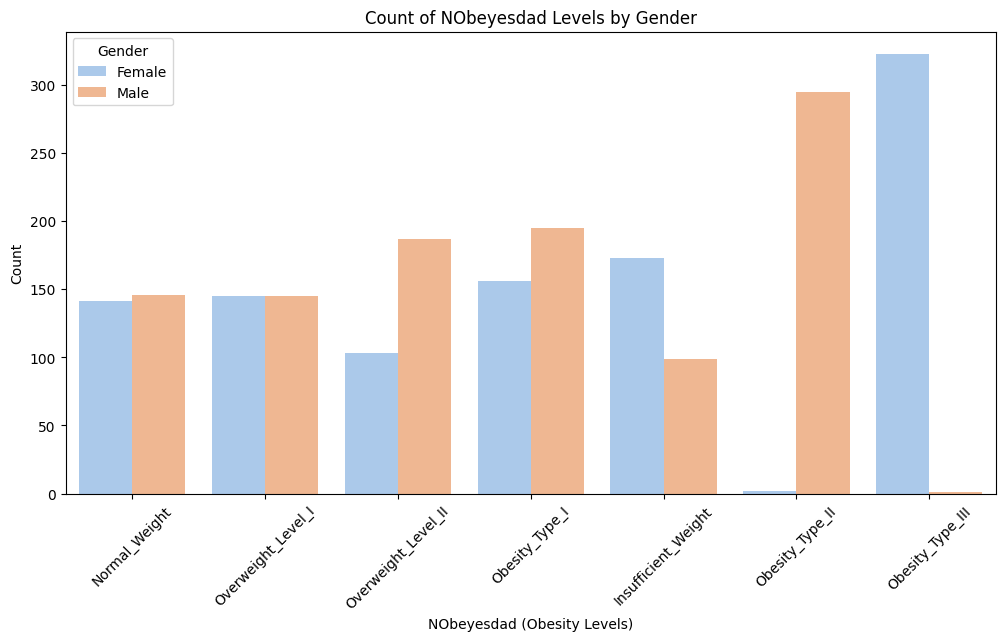

In [23]:
# Count plot for Gender against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by Gender')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])  # Adjusting labels based on encoding
plt.show()

###Age

Text(0, 0.5, 'Frequency')

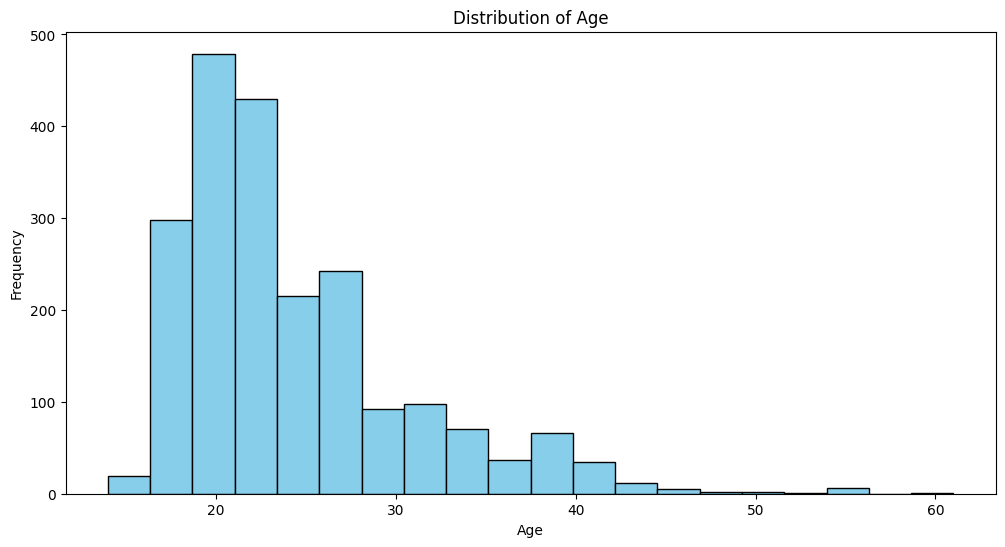

In [24]:
# Plot histograms for Age
plt.figure(figsize=(12, 6))

plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

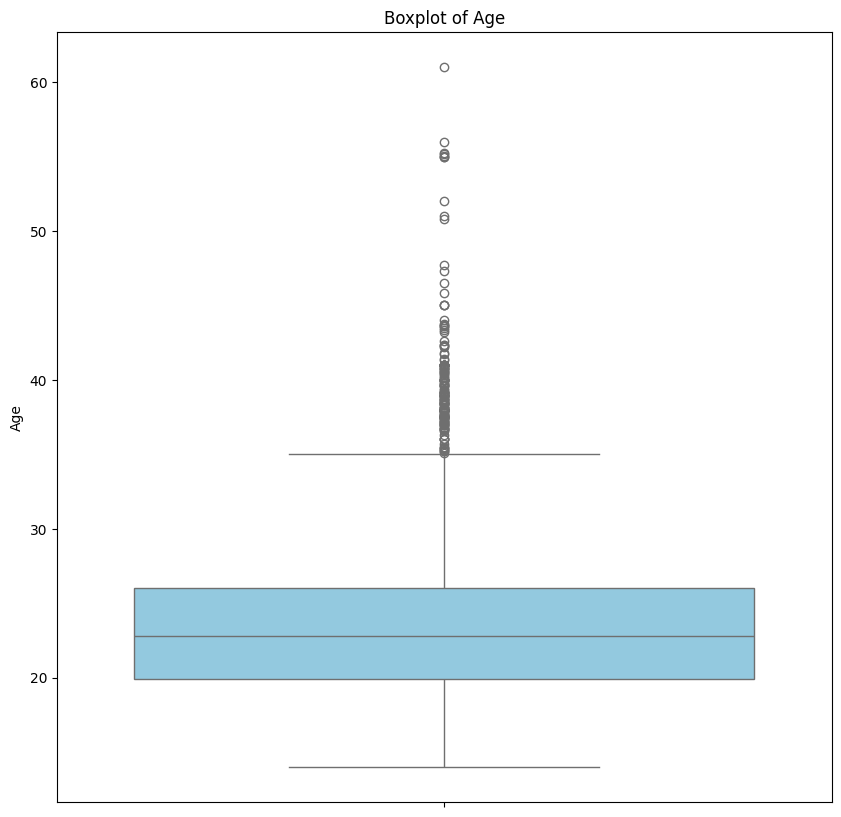

In [25]:
# Plot boxplot for Age
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

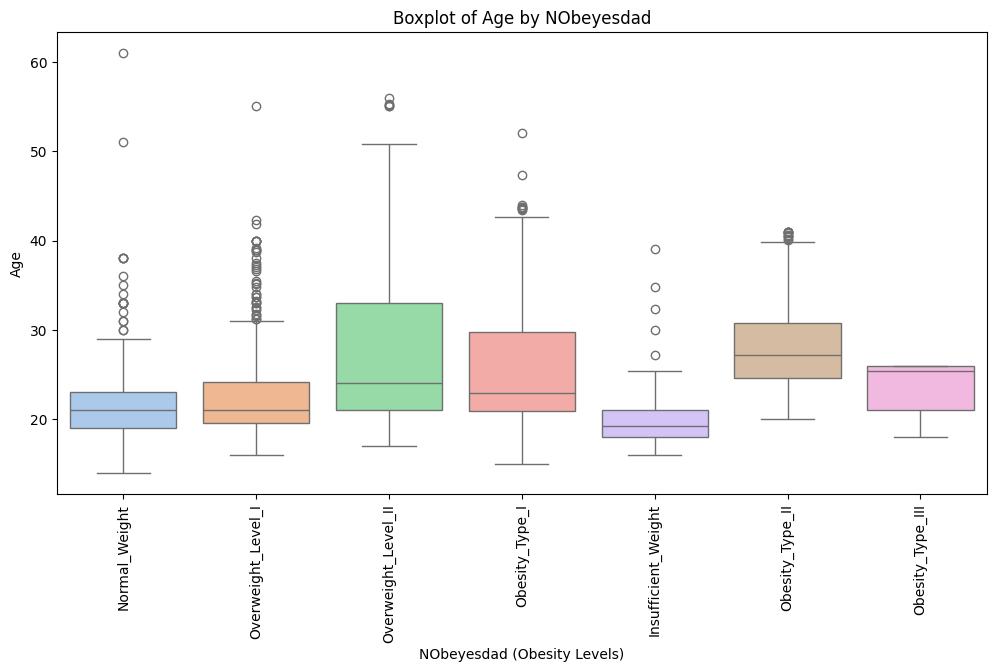

In [26]:
# Boxplot for 'Age' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=df, palette='pastel')
plt.title('Boxplot of Age by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()

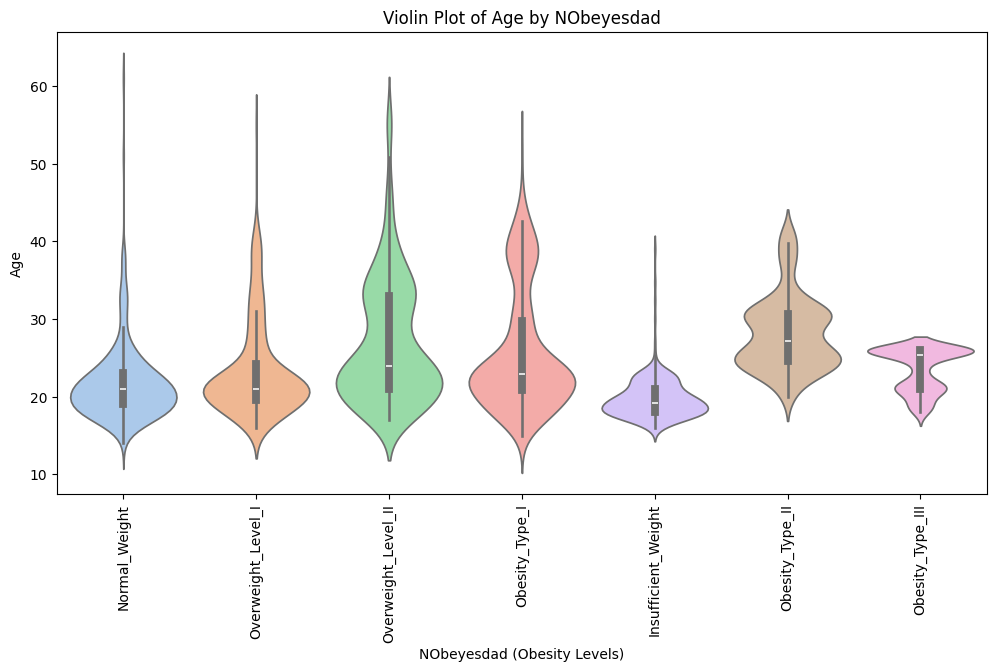

In [27]:
# Plotting a violin plot for 'Age' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Age', data=df, palette='pastel')
plt.title('Violin Plot of Age by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()

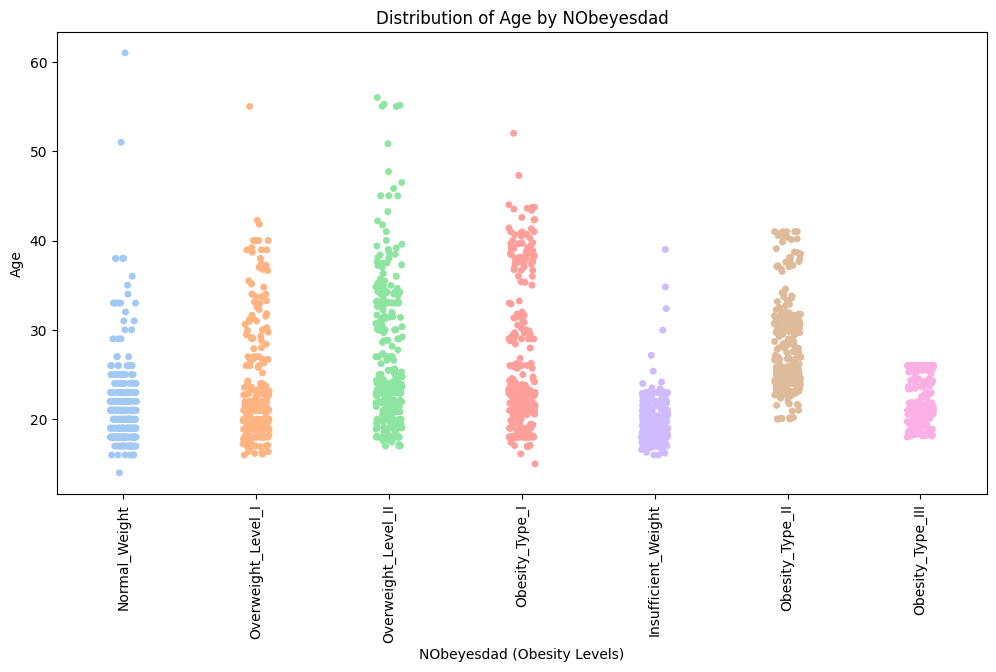

In [28]:
# Strip plot for 'Age' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='Age', data=df, palette='pastel', jitter=True)
plt.title('Distribution of Age by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Age')
plt.xticks(rotation= 90)
plt.show()

###Height

Text(0, 0.5, 'Frequency')

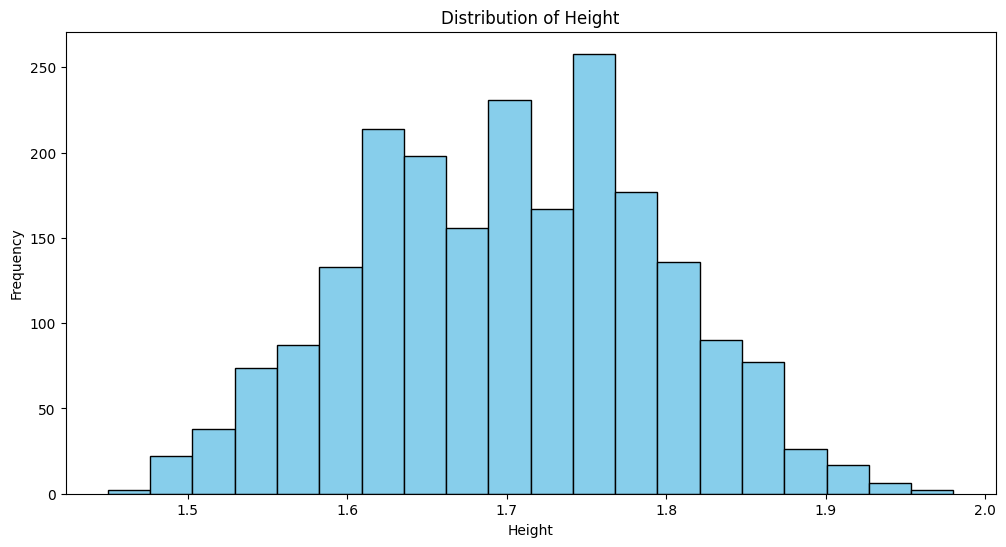

In [29]:
# Plot histograms for Height
plt.figure(figsize=(12, 6))

plt.hist(df['Height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')

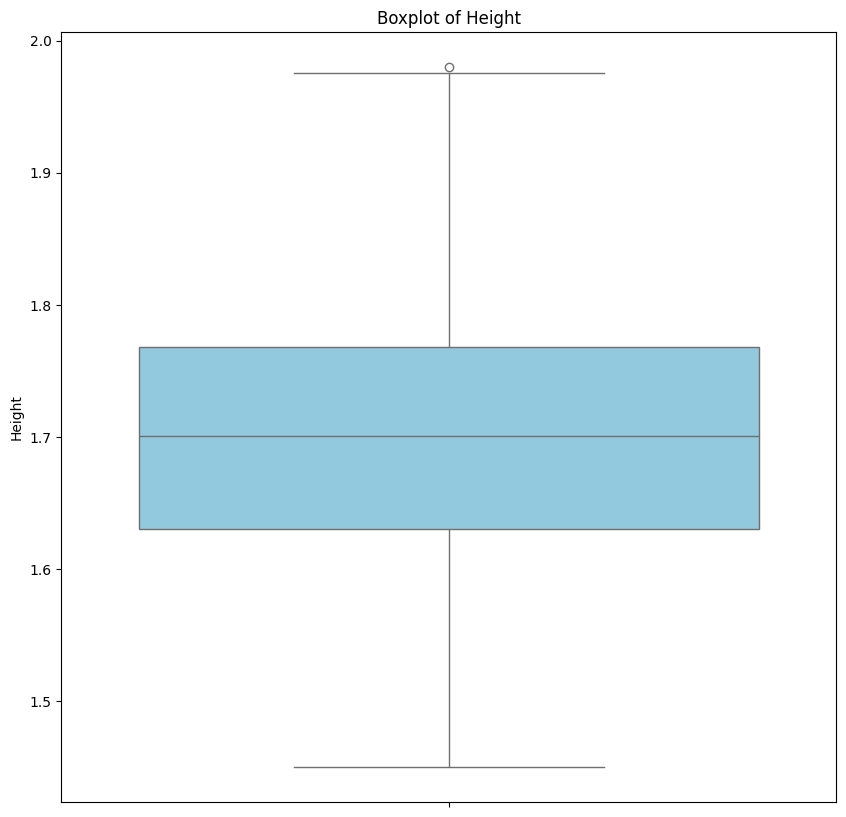

In [30]:
# Plot boxplot for Height
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['Height'], color='skyblue')
plt.title('Boxplot of Height')
plt.ylabel('Height')
plt.show()

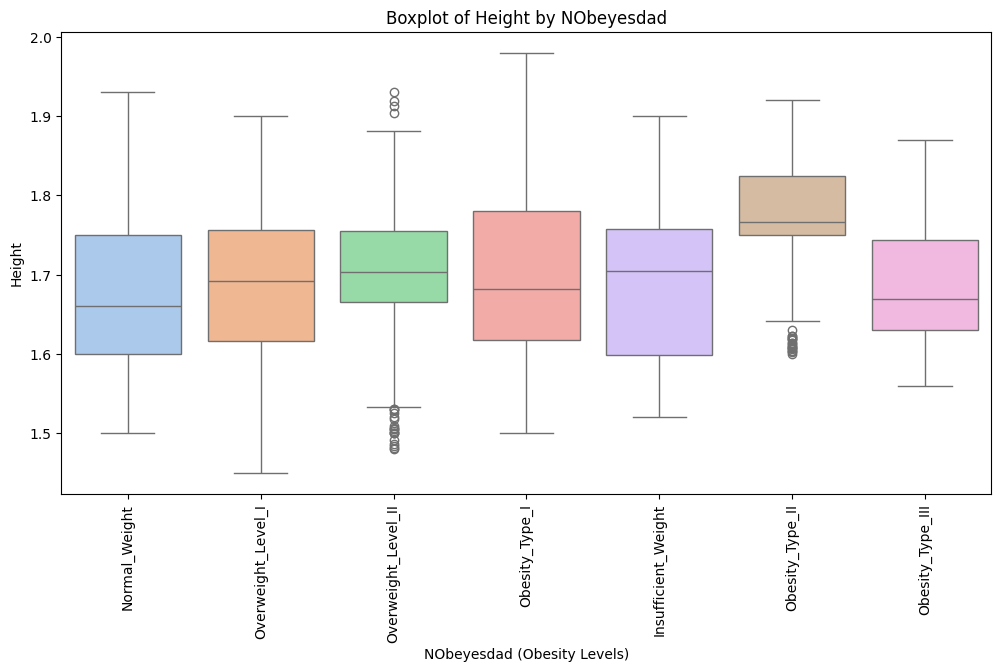

In [31]:
# Boxplot for 'Height' against 'NObeyesdad' to show the distribution of Height across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Height', data=df, palette='pastel')
plt.title('Boxplot of Height by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Height')
plt.xticks(rotation = 90)
plt.show()

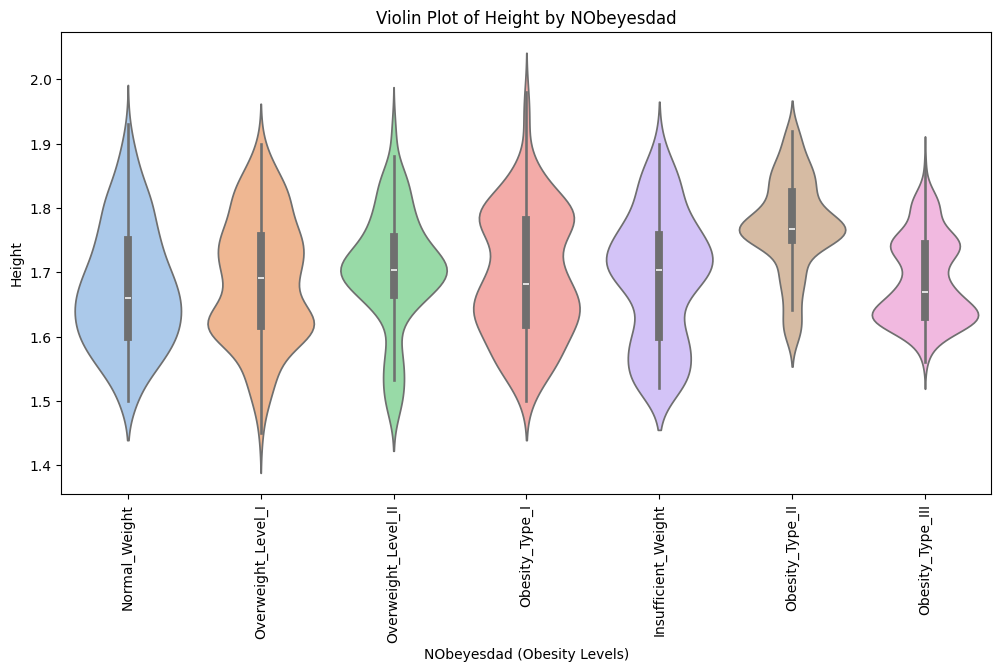

In [32]:
# Violin plot for 'Height' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Height', data=df, palette='pastel')
plt.title('Violin Plot of Height by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Height')
plt.xticks(rotation = 90)
plt.show()

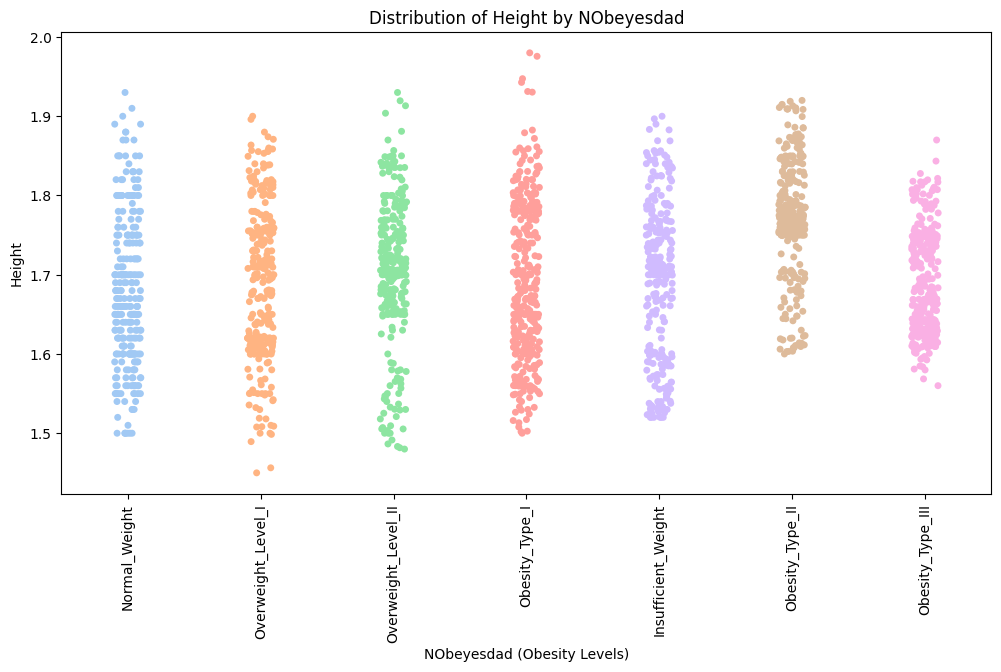

In [33]:
# Strip plot for 'Height' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='Height', data=df, palette='pastel', jitter=True)
plt.title('Distribution of Height by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Height')
plt.xticks(rotation= 90)
plt.show()

###Weight

Text(0, 0.5, 'Frequency')

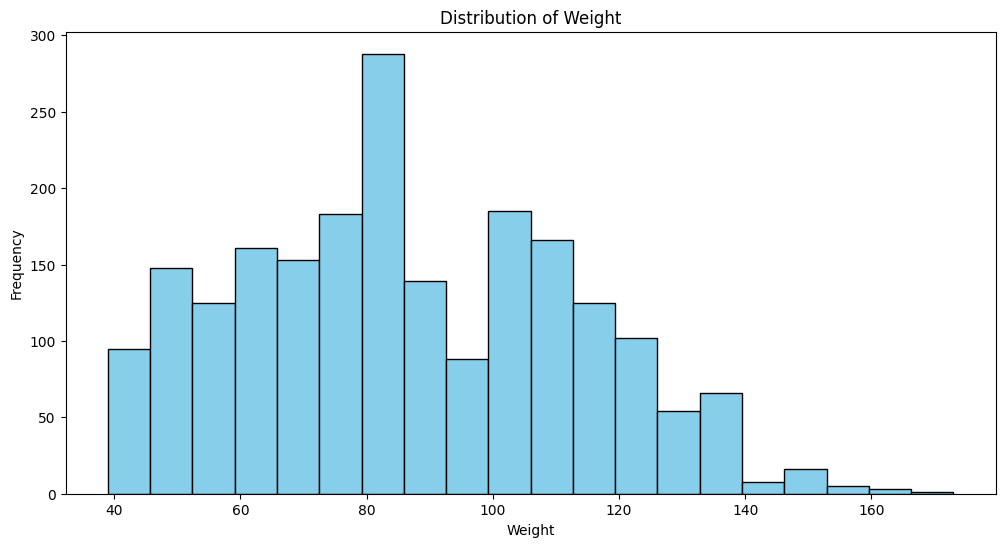

In [34]:
# Plot histograms for Weight
plt.figure(figsize=(12, 6))

plt.hist(df['Weight'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

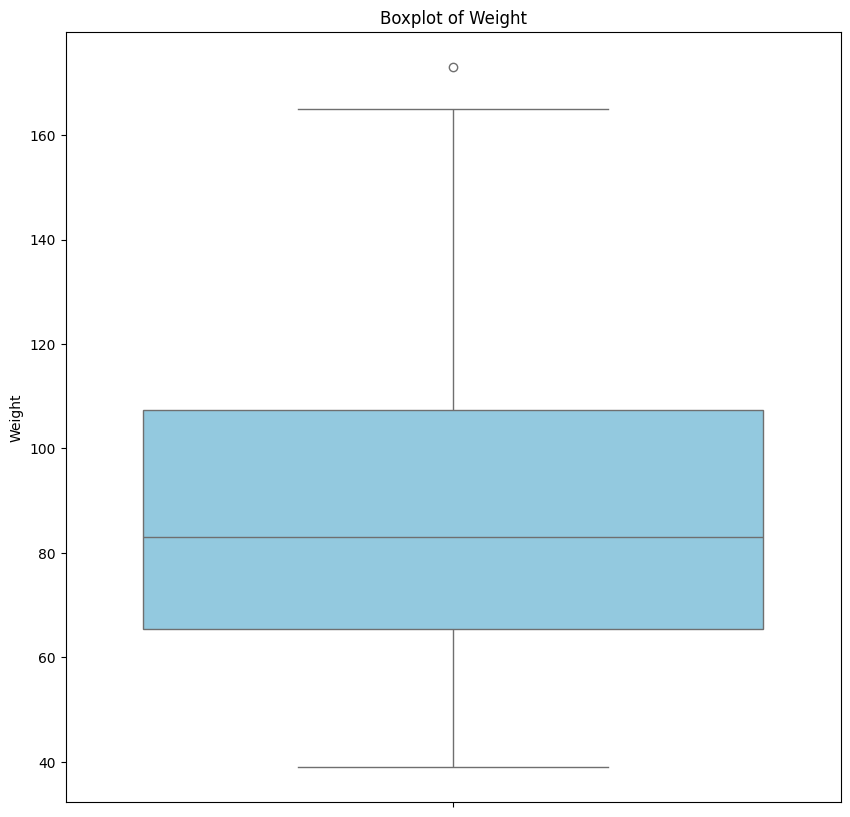

In [35]:
# Plot boxplot for Weight
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['Weight'], color='skyblue')
plt.title('Boxplot of Weight')
plt.ylabel('Weight')
plt.show()

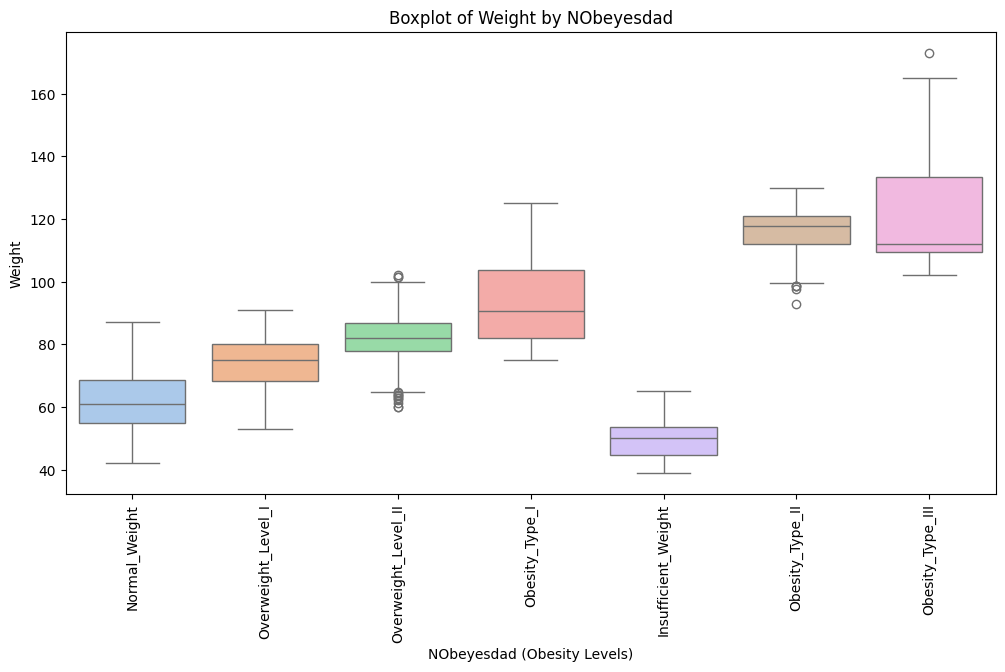

In [36]:
# Boxplot for 'Weight' against 'NObeyesdad' to show the distribution of Height across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette='pastel')
plt.title('Boxplot of Weight by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Weight')
plt.xticks(rotation = 90)
plt.show()

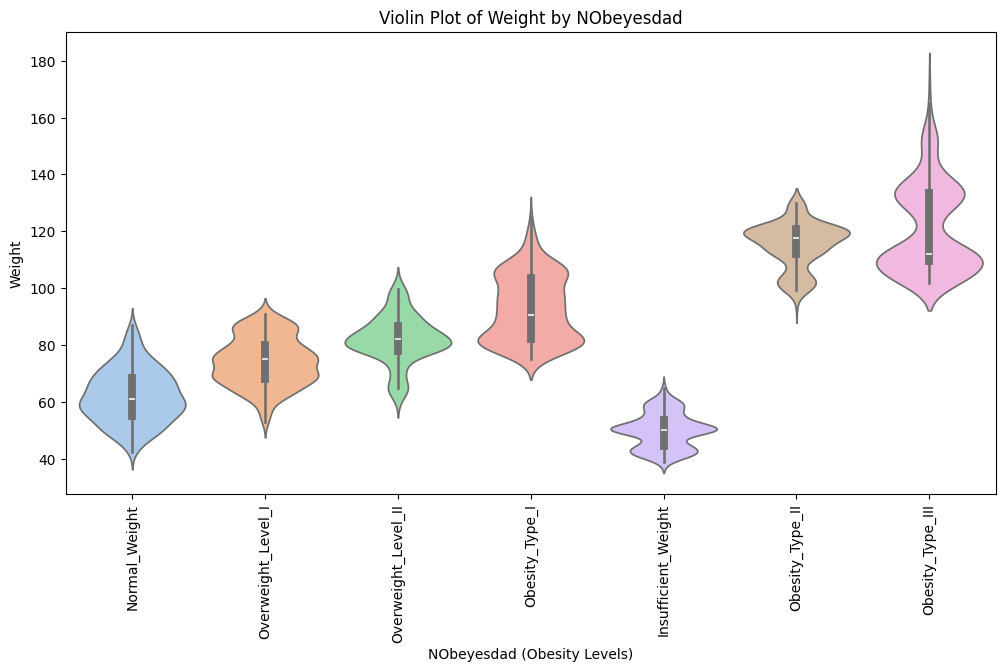

In [37]:
# Violin plot for 'Weight' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='Weight', data=df, palette='pastel')
plt.title('Violin Plot of Weight by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Weight')
plt.xticks(rotation = 90)
plt.show()

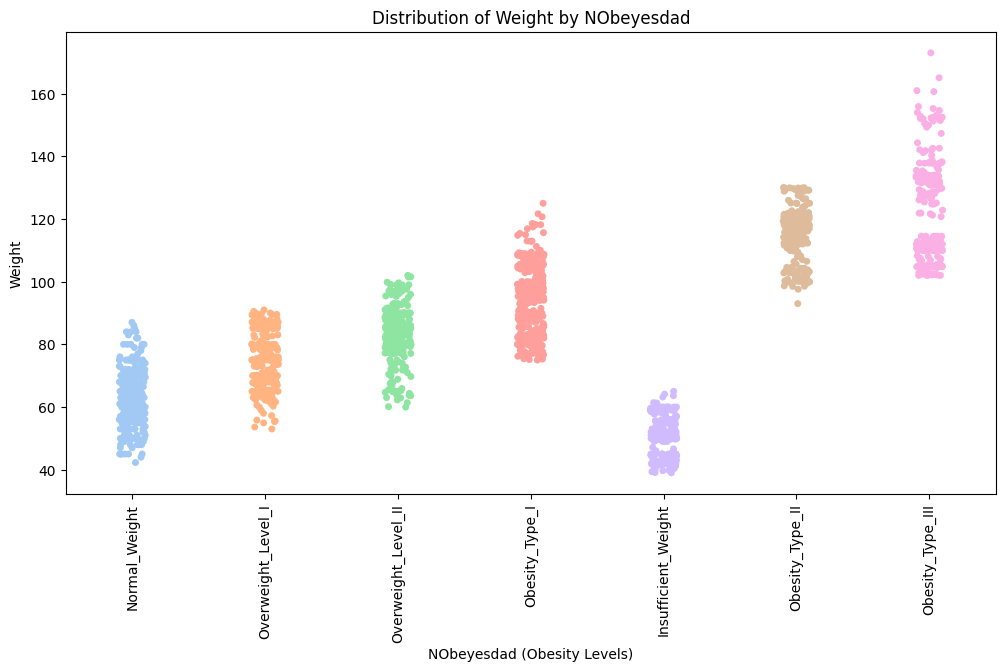

In [38]:
# Strip plot for 'Weight' against 'NObeyesdad' to show the distribution of age across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='Weight', data=df, palette='pastel', jitter=True)
plt.title('Distribution of Weight by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Weight')
plt.xticks(rotation= 90)
plt.show()

###family_history_with_overweight

In [39]:
# Counting the occurrences of each value in the 'family_history_with_overweight' column
family_history_counts = df['family_history_with_overweight'].value_counts()
family_history_counts

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

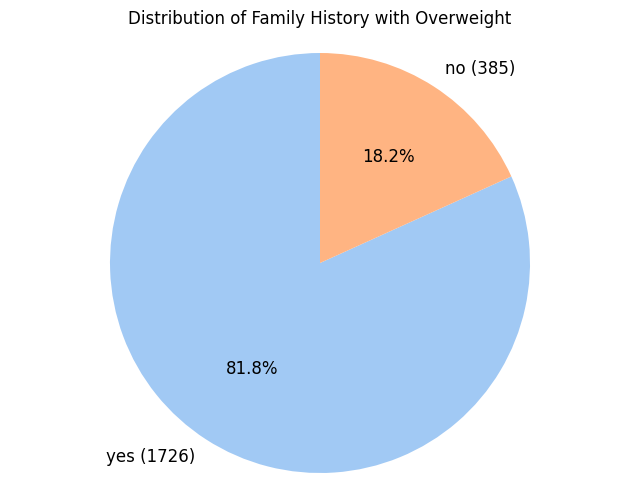

In [40]:
# Counting the occurrences of each value in the 'family_history_with_overweight' column
family_history_counts = df['family_history_with_overweight'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    family_history_counts,
    labels=[f"{label} ({count})" for label, count in zip(family_history_counts.index, family_history_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of Family History with Overweight')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [41]:
# Creating a cross-tabulation table of counts for 'family_history_with_overweight' against 'NObeyesdad'
family_history_with_overweight_nobeyesdad_counts = pd.crosstab(df['family_history_with_overweight'], df['NObeyesdad'])
family_history_with_overweight_nobeyesdad_counts

NObeyesdad                      Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                              146            132   
yes                                             126            155   

NObeyesdad                      Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                           7                1   
yes                                        344              296   

NObeyesdad                      Obesity_Type_III  Overweight_Level_I  \
family_history_with_overweight                                         
no                                             0                  81   
yes                                          324                 209   

NObeyesdad                      Overweight_Level_II  
family_history_with_overweight                       
no                                               18  
yes                                             272

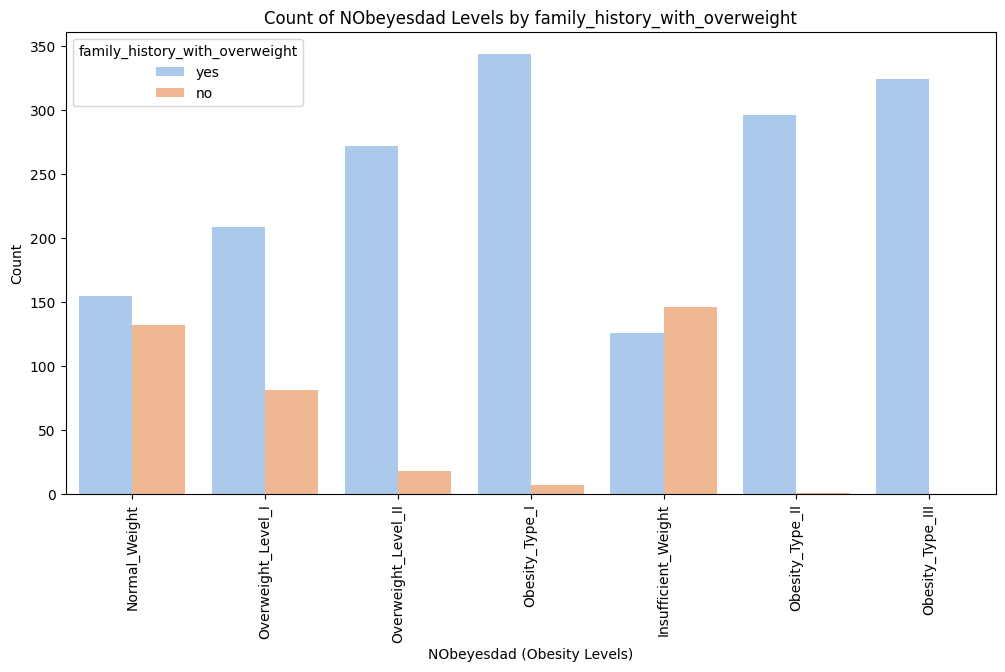

In [42]:
# Count plot for family_history_with_overweight against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by family_history_with_overweight')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='family_history_with_overweight', labels=['yes', 'no'])  # Adjusting labels based on encoding
plt.show()

###FAVC

In [43]:
# Counting the occurrences of each value in the 'FAVC' column
FAVC_counts = df['FAVC'].value_counts()
FAVC_counts

FAVC
yes    1866
no      245
Name: count, dtype: int64

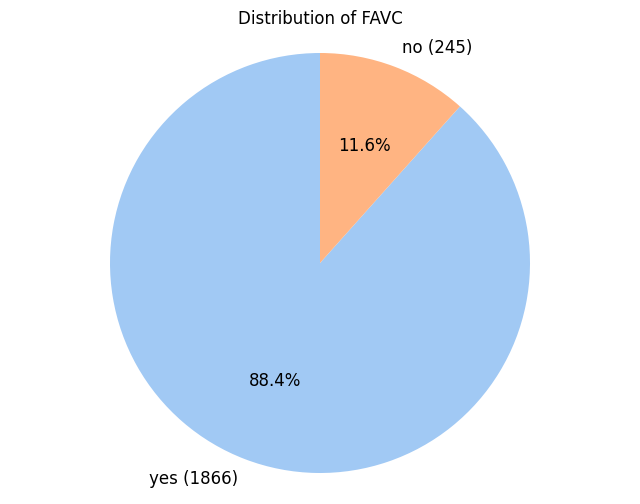

In [44]:
# Counting the occurrences of each value in the 'FAVC' column
FAVC_counts = df['FAVC'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    FAVC_counts,
    labels=[f"{label} ({count})" for label, count in zip(FAVC_counts.index, FAVC_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of FAVC')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [45]:
# Creating a cross-tabulation table of counts for FAVC against NObeyesdad
FAVC_nobeyesdad_counts = pd.crosstab(df['FAVC'], df['NObeyesdad'])
FAVC_nobeyesdad_counts

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
FAVC                                                             
no                           51             79              11   
yes                         221            208             340   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
FAVC                                                                
no                        7                 1                  22   
yes                     290               323                 268   

NObeyesdad  Overweight_Level_II  
FAVC                             
no                           74  
yes                         216

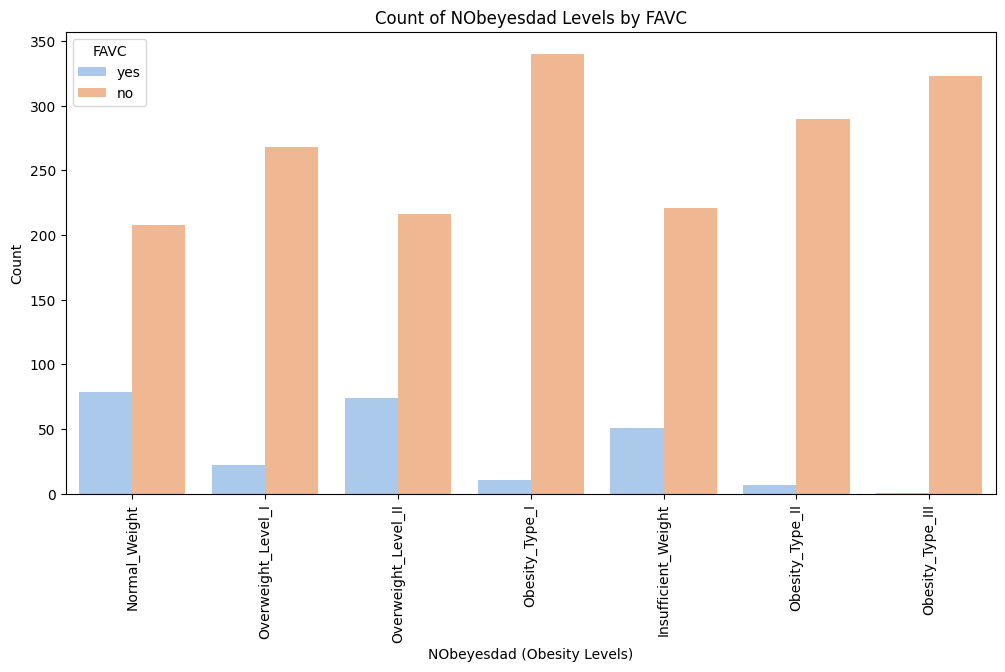

In [46]:
# Count plot for FAVC against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='FAVC', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by FAVC')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='FAVC', labels=['yes', 'no'])  # Adjusting labels based on encoding
plt.show()

### FCVC

Text(0, 0.5, 'Frequency')

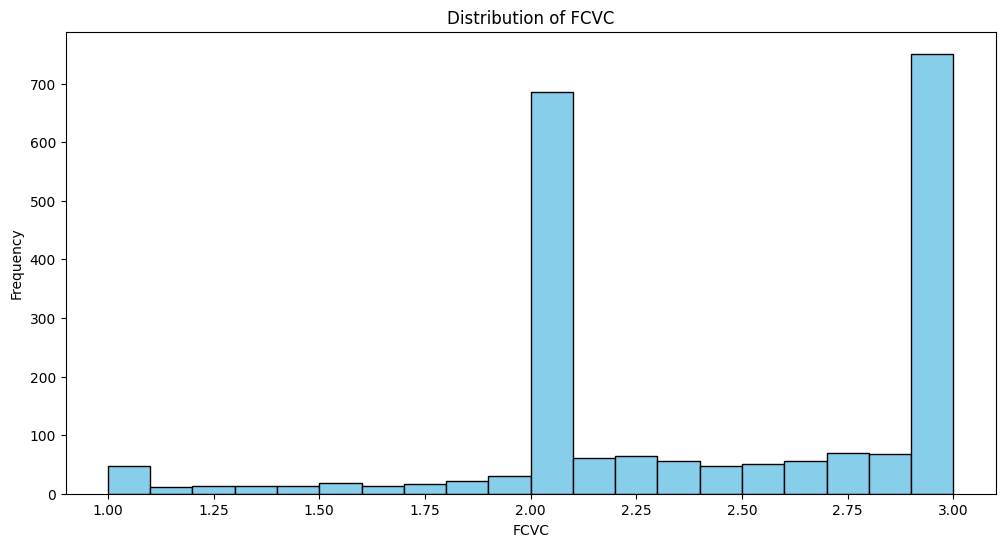

In [47]:
# Plot histograms for FCVC
plt.figure(figsize=(12, 6))

plt.hist(df['FCVC'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of FCVC')
plt.xlabel('FCVC')
plt.ylabel('Frequency')

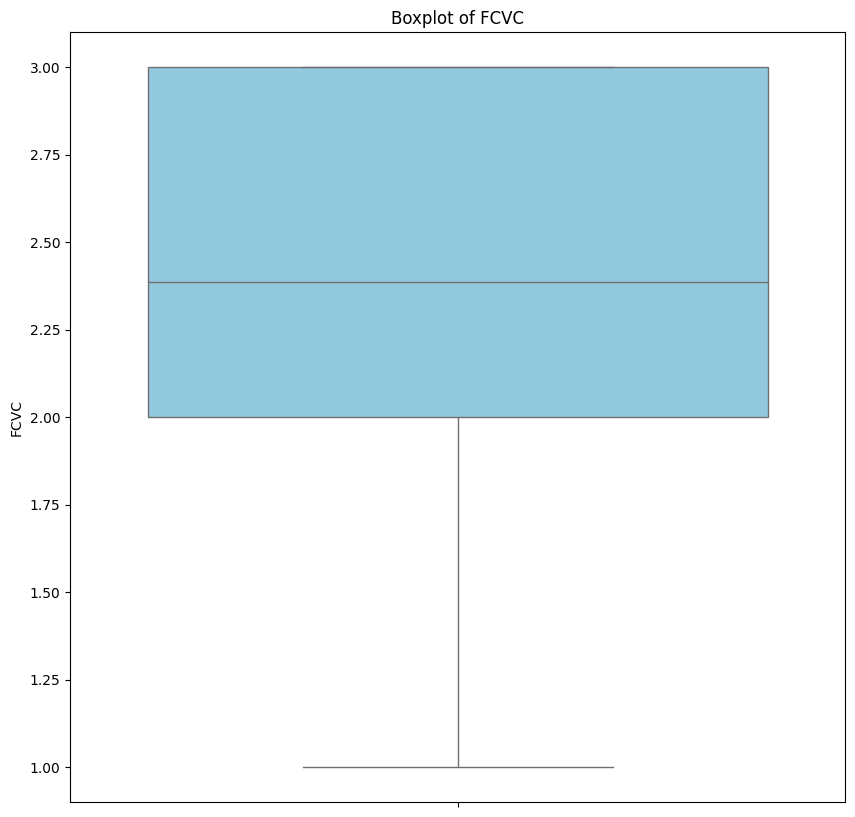

In [48]:
# Plot boxplot for FCVC
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['FCVC'], color='skyblue')
plt.title('Boxplot of FCVC')
plt.ylabel('FCVC')
plt.show()

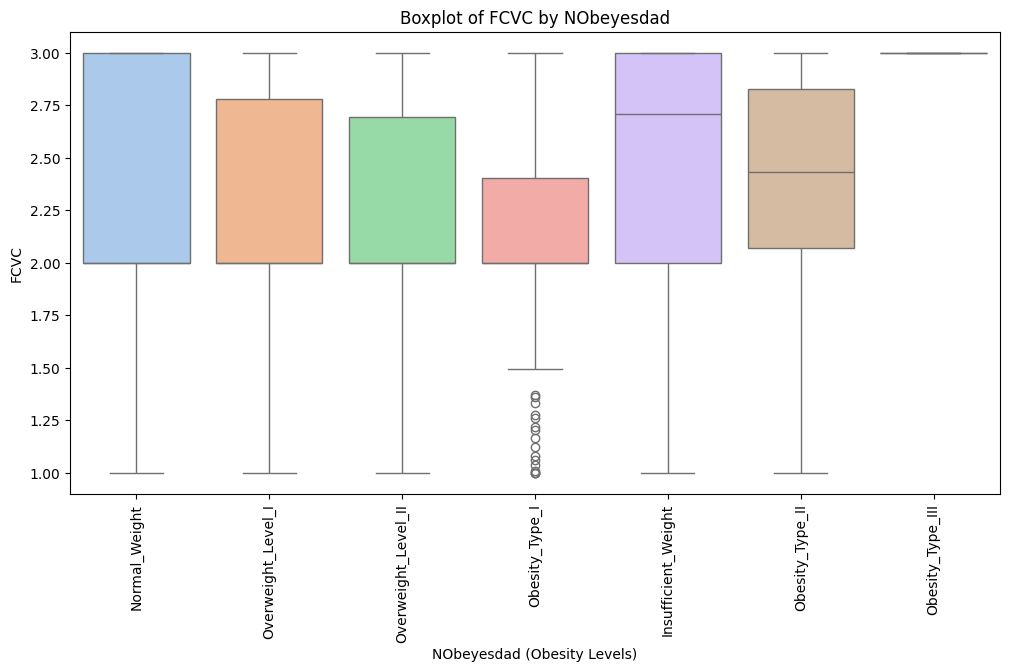

In [49]:
# Boxplot for FCVC against NObeyesdad to show the distribution of FCVC across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='FCVC', data=df, palette='pastel')
plt.title('Boxplot of FCVC by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FCVC')
plt.xticks(rotation = 90)
plt.show()

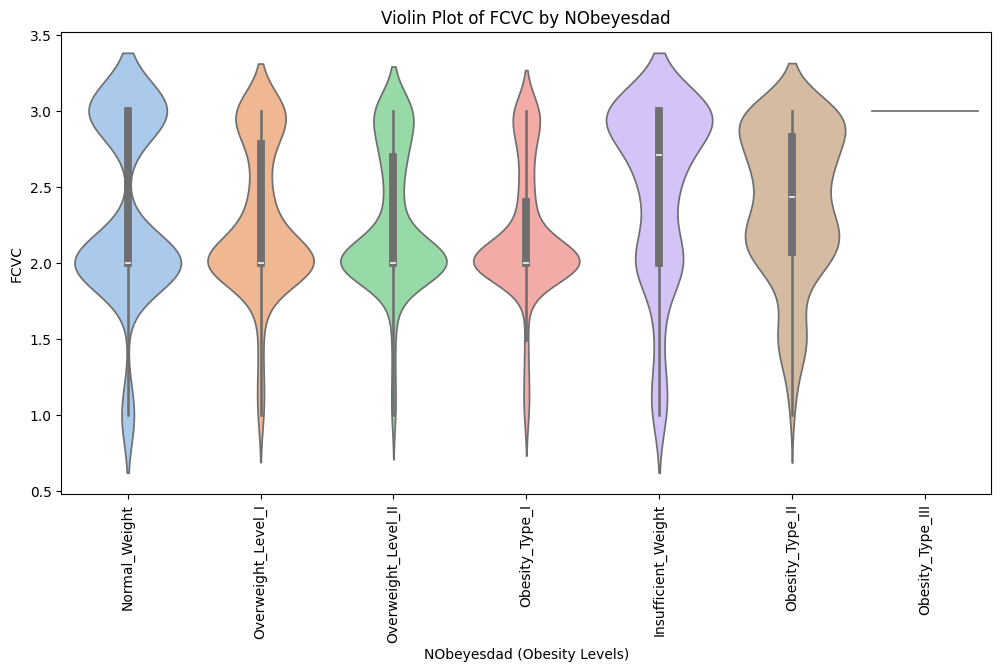

In [50]:
# Violin plot for 'FCVC' against 'NObeyesdad' to show the distribution of FCVC across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='FCVC', data=df, palette='pastel')
plt.title('Violin Plot of FCVC by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FCVC')
plt.xticks(rotation = 90)
plt.show()

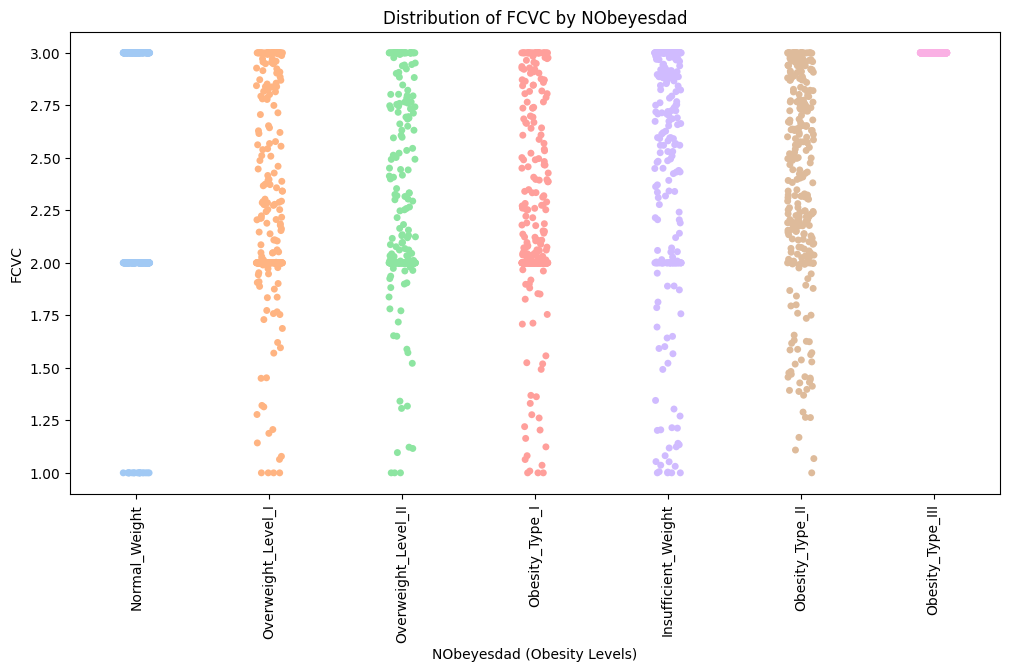

In [51]:
# Strip plot for 'FCVC' against 'NObeyesdad' to show the distribution of FCVC across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='FCVC', data=df, palette='pastel', jitter=True)
plt.title('Distribution of FCVC by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FCVC')
plt.xticks(rotation= 90)
plt.show()

###NCP

Text(0, 0.5, 'Frequency')

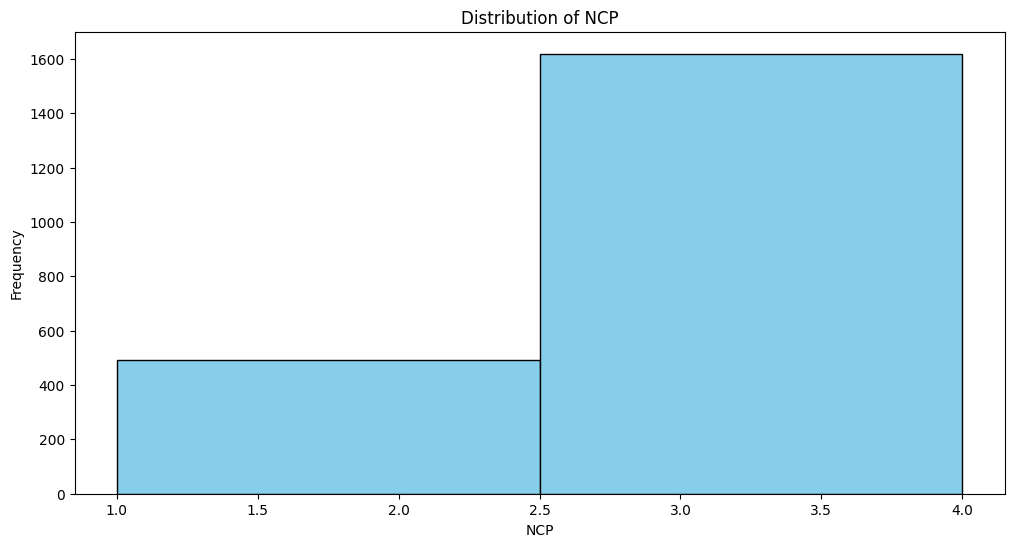

In [52]:
# Plot histograms for NCP
plt.figure(figsize=(12, 6))

plt.hist(df['NCP'], bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of NCP')
plt.xlabel('NCP')
plt.ylabel('Frequency')

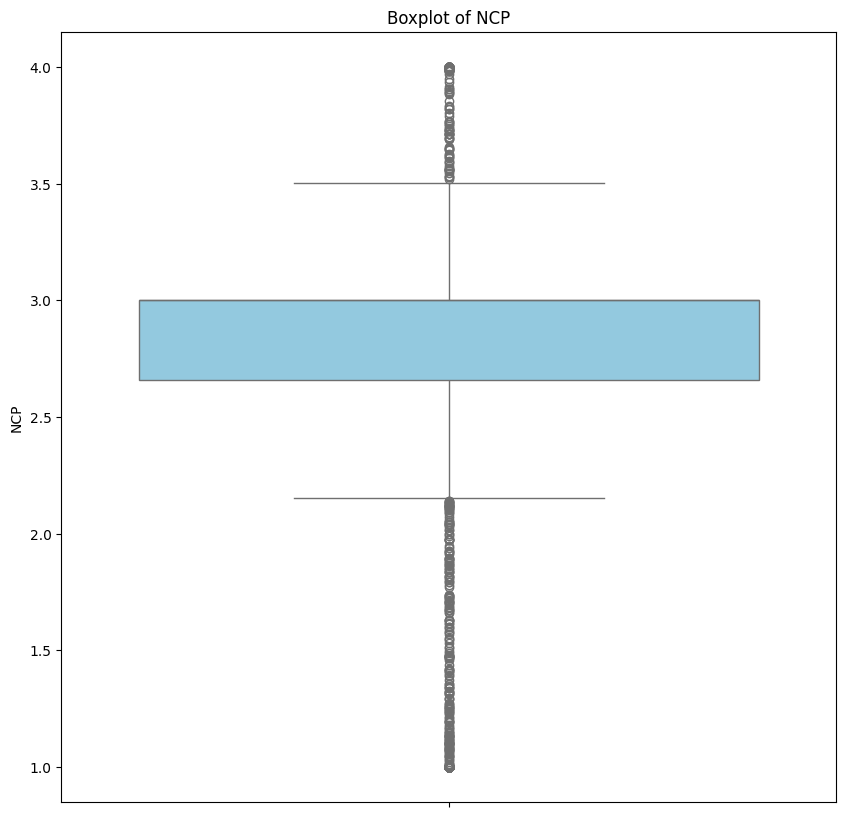

In [53]:
# Plot boxplot for NCP
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['NCP'], color='skyblue')
plt.title('Boxplot of NCP')
plt.ylabel('NCP')
plt.show()

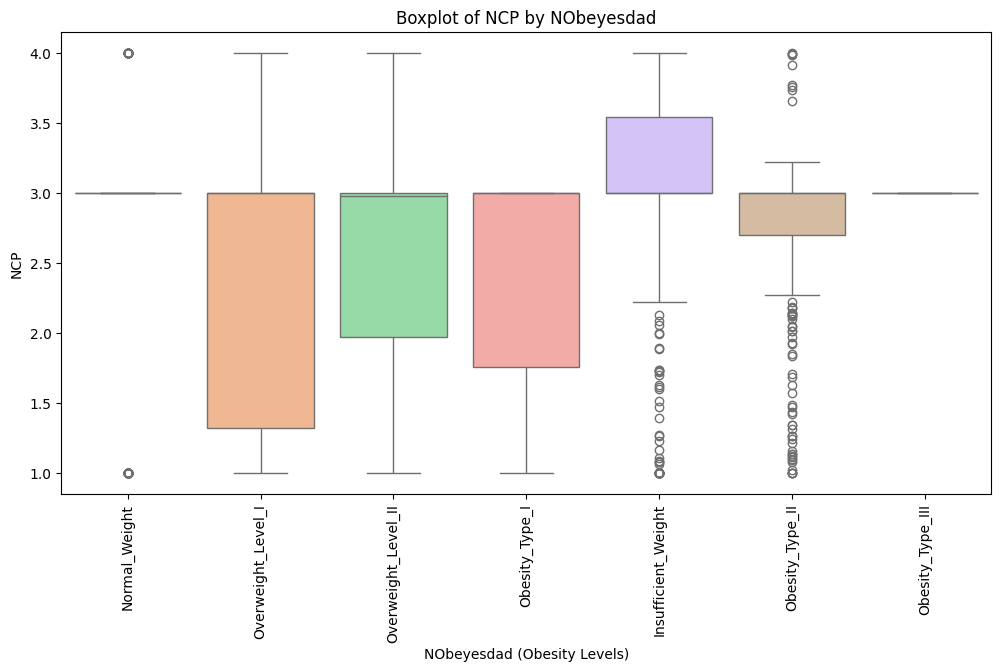

In [54]:
# Boxplot for NCP against NObeyesdad to show the distribution of NCP across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='NCP', data=df, palette='pastel')
plt.title('Boxplot of NCP by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('NCP')
plt.xticks(rotation = 90)
plt.show()

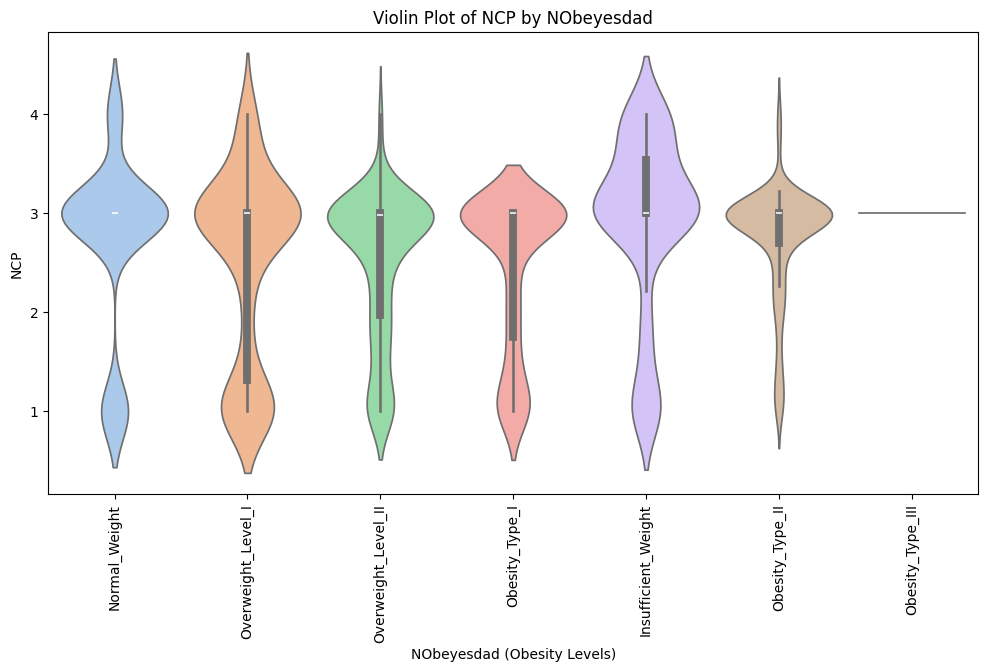

In [55]:
# Violin plot for 'NCP' against 'NObeyesdad' to show the distribution of NCP across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='NCP', data=df, palette='pastel')
plt.title('Violin Plot of NCP by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('NCP')
plt.xticks(rotation = 90)
plt.show()

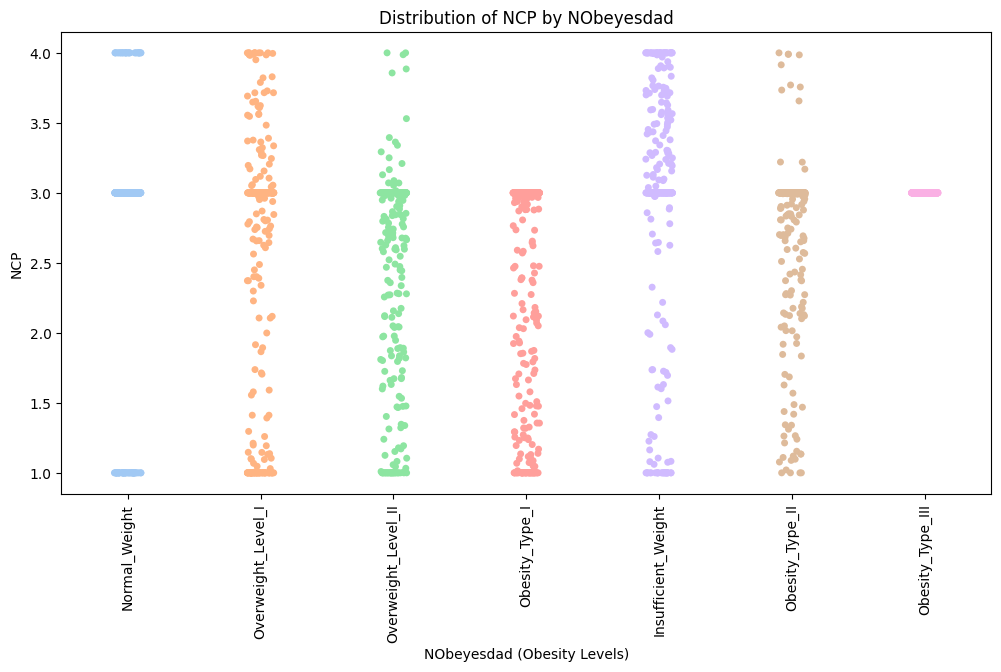

In [56]:
# Strip plot for 'NCP' against 'NObeyesdad' to show the distribution of NCP across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='NCP', data=df, palette='pastel', jitter=True)
plt.title('Distribution of NCP by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('NCP')
plt.xticks(rotation= 90)
plt.show()

###CAEC

In [57]:
# Counting the occurrences of each value in the CAEC column
CAEC_counts = df['CAEC'].value_counts()
CAEC_counts

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

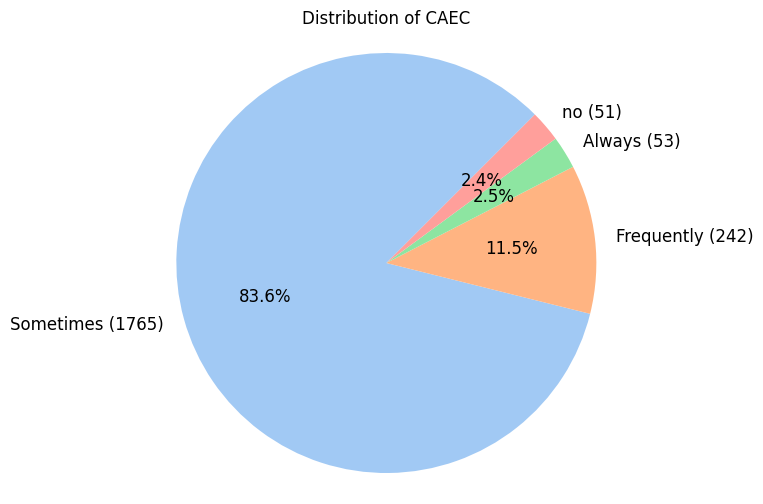

In [58]:
# Counting the occurrences of each value in the CAEC column
CAEC_counts = df['CAEC'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    CAEC_counts,
    labels=[f"{label} ({count})" for label, count in zip(CAEC_counts.index, CAEC_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=45,
    textprops={'fontsize': 12}
)
plt.title('Distribution of CAEC')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [59]:
# Creating a cross-tabulation table of counts for CAEC against NObeyesdad
CAEC_nobeyesdad_counts = pd.crosstab(df['CAEC'], df['NObeyesdad'])
CAEC_nobeyesdad_counts

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CAEC                                                             
Always                        2             35               6   
Frequently                  121             83               6   
Sometimes                   146            159             338   
no                            3             10               1   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CAEC                                                                
Always                    2                 0                   5   
Frequently                1                 1                  14   
Sometimes               293               323                 236   
no                        1                 0                  35   

NObeyesdad  Overweight_Level_II  
CAEC                             
Always                        3  
Frequently                   16  
Sometimes                   270  
no                            1

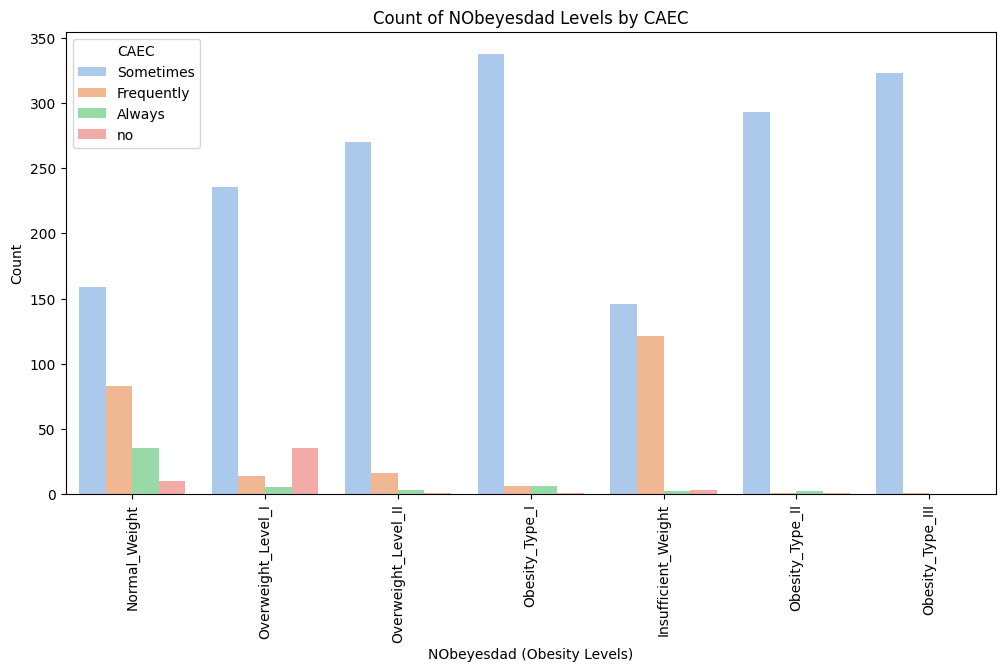

In [60]:
# Count plot for CAEC against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='CAEC', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by CAEC')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='CAEC', labels=['Sometimes', 'Frequently', 'Always', 'no'])  # Adjusting labels based on encoding
plt.show()

###SMOKE

In [61]:
# Counting the occurrences of each value in the 'SMOKE' column
SMOKE_counts = df['SMOKE'].value_counts()
SMOKE_counts

SMOKE
no     2067
yes      44
Name: count, dtype: int64

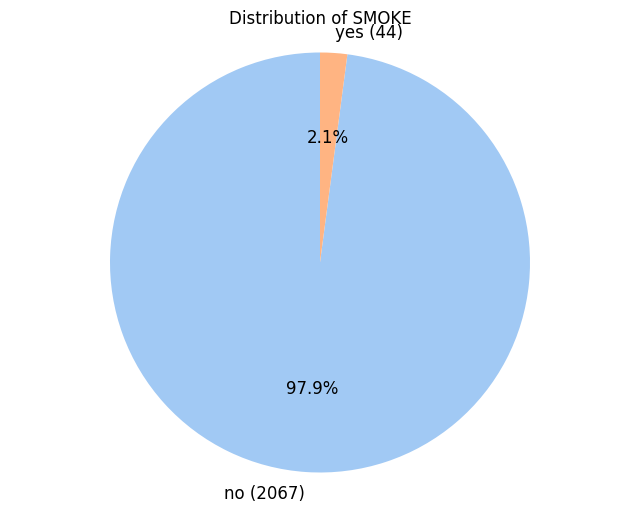

In [62]:
# Counting the occurrences of each value in the 'SMOKE' column
SMOKE_counts = df['SMOKE'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    SMOKE_counts,
    labels=[f"{label} ({count})" for label, count in zip(SMOKE_counts.index, SMOKE_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of SMOKE')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [63]:
# Creating a cross-tabulation table of counts for 'SMOKE' against 'NObeyesdad'
SMOKE_nobeyesdad_counts = pd.crosstab(df['SMOKE'], df['NObeyesdad'])
SMOKE_nobeyesdad_counts

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SMOKE                                                            
no                          271            274             345   
yes                           1             13               6   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SMOKE                                                               
no                      282               323                 287   
yes                      15                 1                   3   

NObeyesdad  Overweight_Level_II  
SMOKE                            
no                          285  
yes                           5

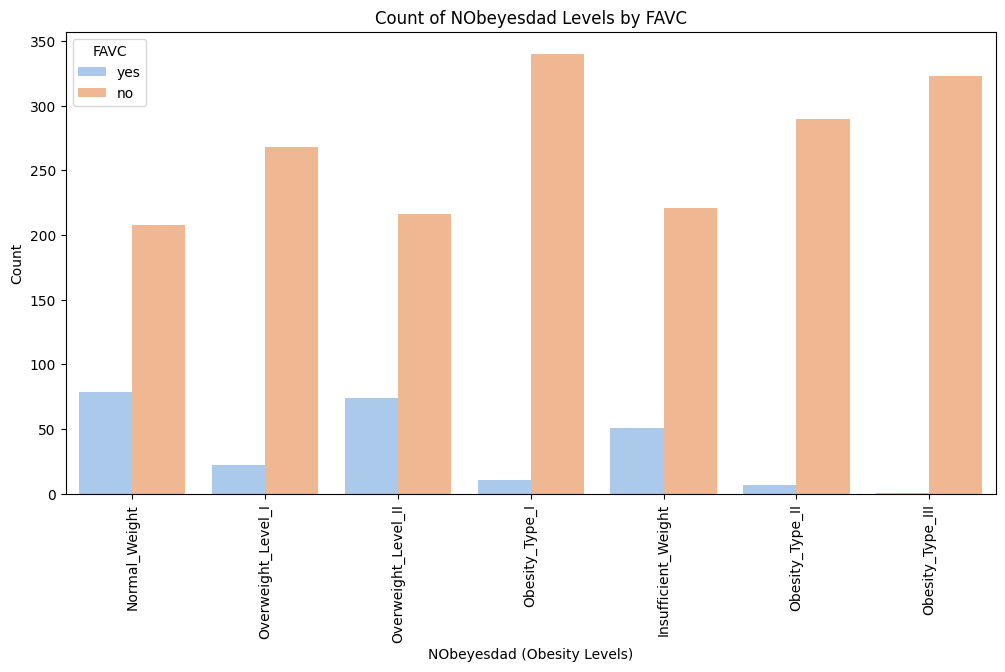

In [64]:
# Count plot for FAVC against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='FAVC', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by FAVC')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='FAVC', labels=['yes', 'no'])  # Adjusting labels based on encoding
plt.show()

###CH2O

Text(0, 0.5, 'Frequency')

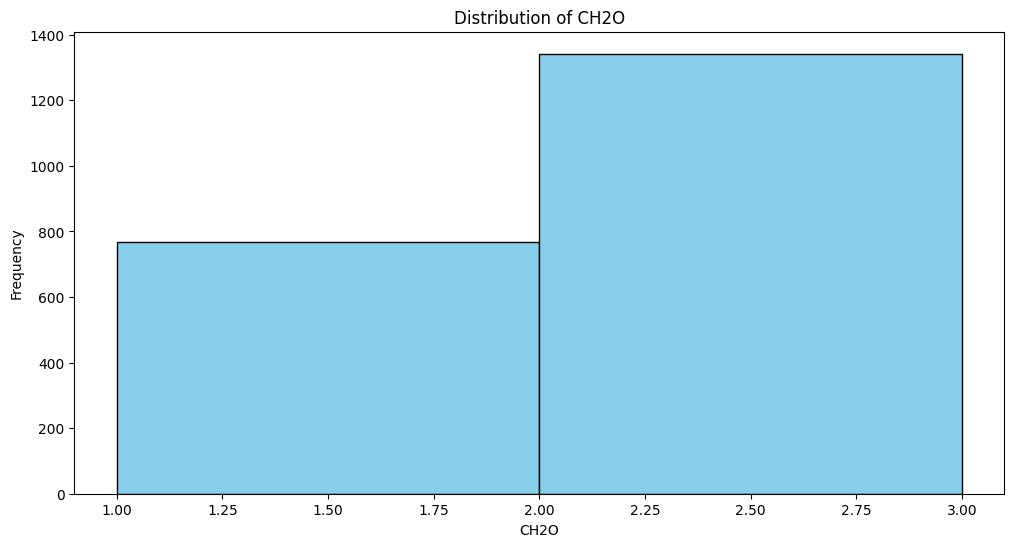

In [65]:
# Plot histograms for CH2O
plt.figure(figsize=(12, 6))

plt.hist(df['CH2O'], bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of CH2O')
plt.xlabel('CH2O')
plt.ylabel('Frequency')

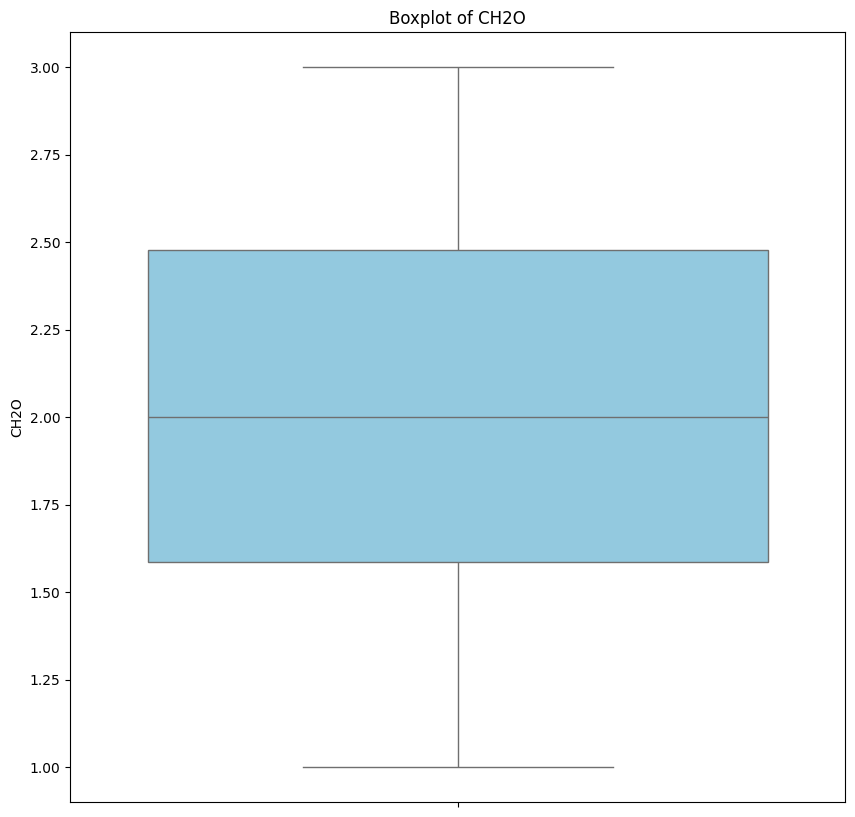

In [66]:
# Plot boxplot for CH2O
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['CH2O'], color='skyblue')
plt.title('Boxplot of CH2O')
plt.ylabel('CH2O')
plt.show()

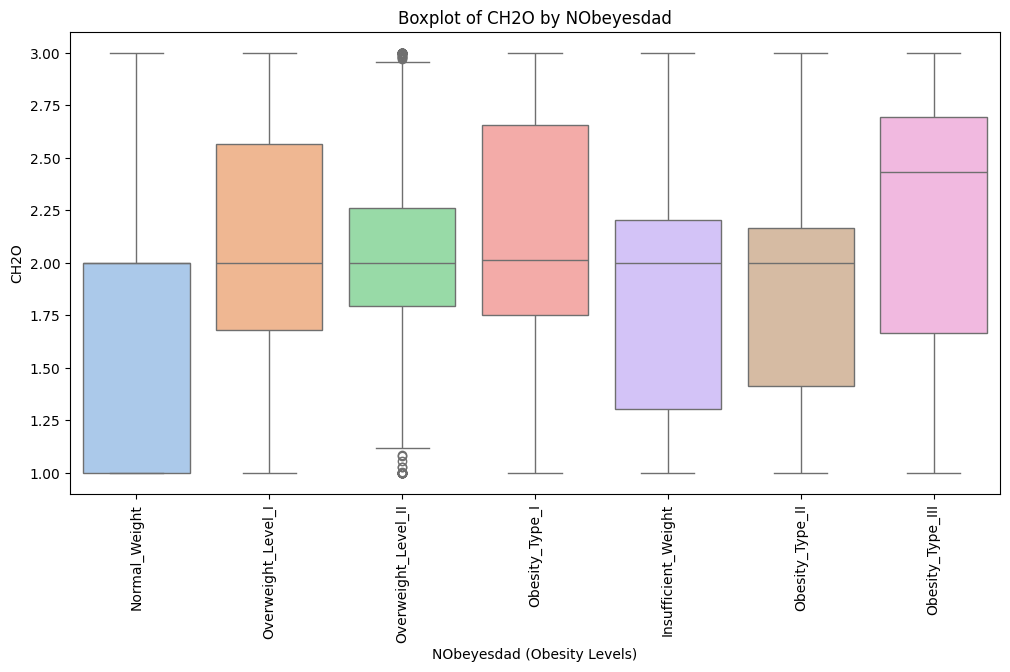

In [67]:
# Boxplot for CH2O against NObeyesdad to show the distribution of CH2O across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='CH2O', data=df, palette='pastel')
plt.title('Boxplot of CH2O by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('CH2O')
plt.xticks(rotation = 90)
plt.show()

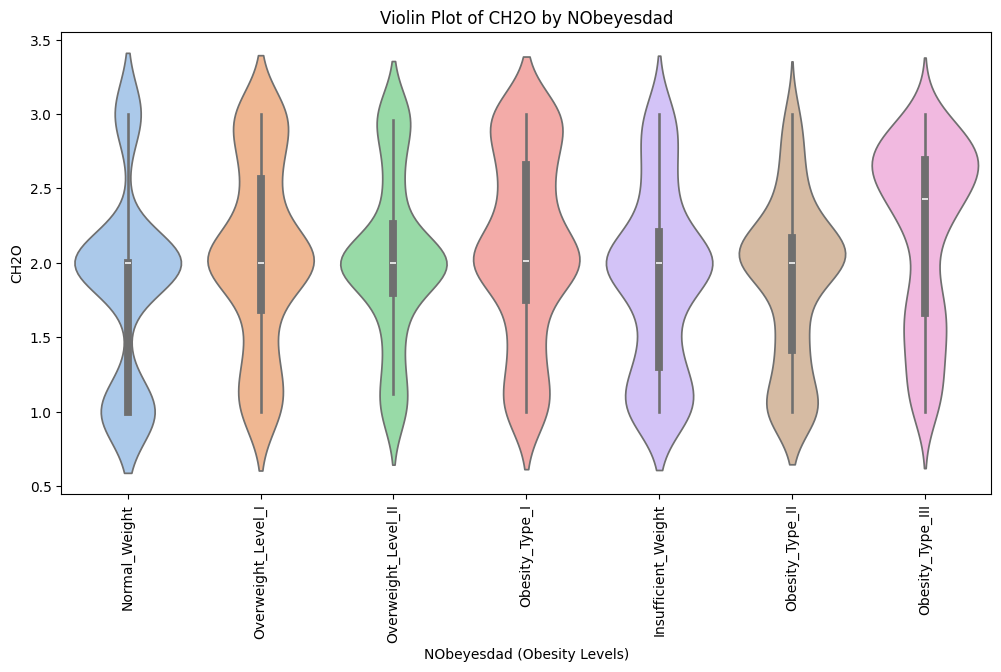

In [68]:
# Violin plot for 'CH2O' against 'NObeyesdad' to show the distribution of CH2O across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='CH2O', data=df, palette='pastel')
plt.title('Violin Plot of CH2O by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('CH2O')
plt.xticks(rotation = 90)
plt.show()

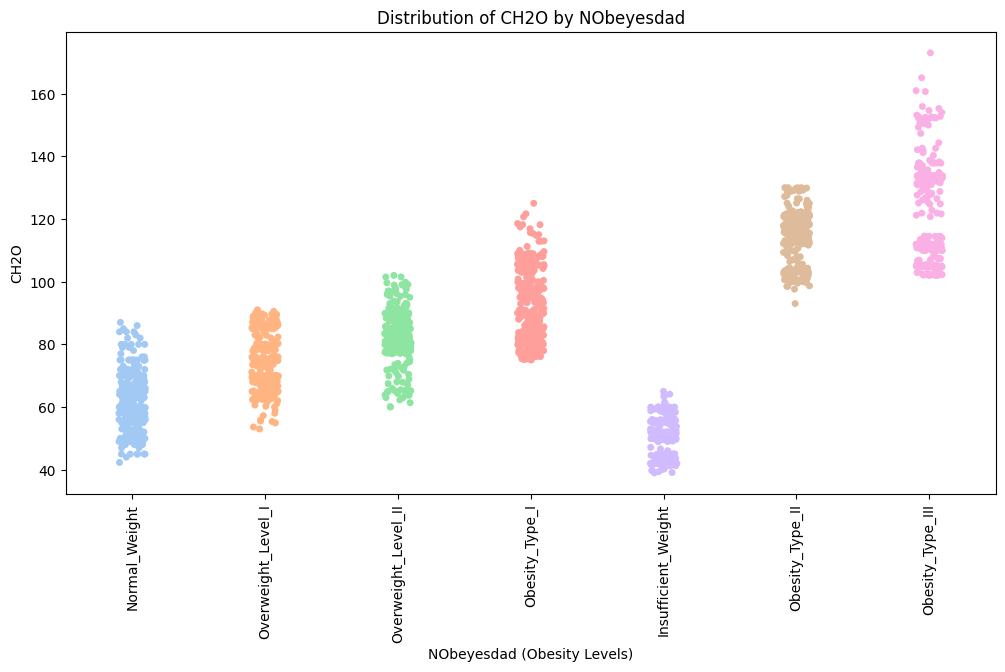

In [69]:
# Strip plot for 'CH2O' against 'NObeyesdad' to show the distribution of CH2O across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='Weight', data=df, palette='pastel', jitter=True)
plt.title('Distribution of CH2O by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('CH2O')
plt.xticks(rotation= 90)
plt.show()

###SCC

In [70]:
# Counting the occurrences of each value in the 'SCC' column
SCC_counts = df['SCC'].value_counts()
SCC_counts

SCC
no     2015
yes      96
Name: count, dtype: int64

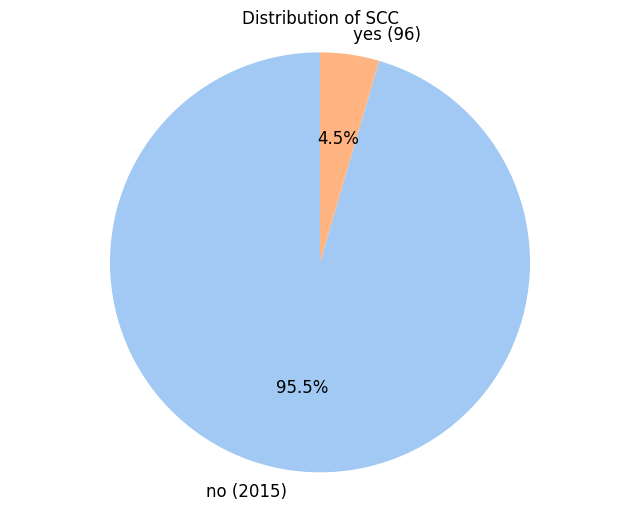

In [71]:
# Counting the occurrences of each value in the 'SCC' column
SCC_counts = df['SCC'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    SCC_counts,
    labels=[f"{label} ({count})" for label, count in zip(SCC_counts.index, SCC_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of SCC')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [72]:
# Creating a cross-tabulation table of counts for 'SCC' against 'NObeyesdad'
SCC_nobeyesdad_counts = pd.crosstab(df['SCC'], df['NObeyesdad'])
SCC_nobeyesdad_counts

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
SCC                                                              
no                          250            257             349   
yes                          22             30               2   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
SCC                                                                 
no                      296               324                 253   
yes                       1                 0                  37   

NObeyesdad  Overweight_Level_II  
SCC                              
no                          286  
yes                           4

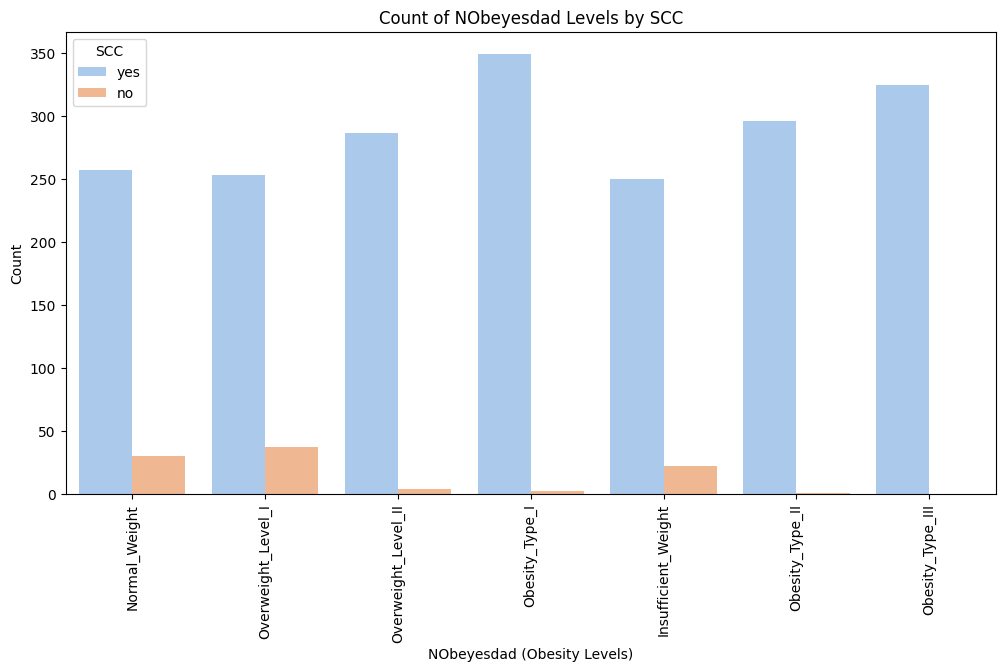

In [73]:
# Count plot for SCC against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='SCC', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by SCC')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='SCC', labels=['yes', 'no'])  # Adjusting labels based on encoding
plt.show()

###FAF

Text(0, 0.5, 'Frequency')

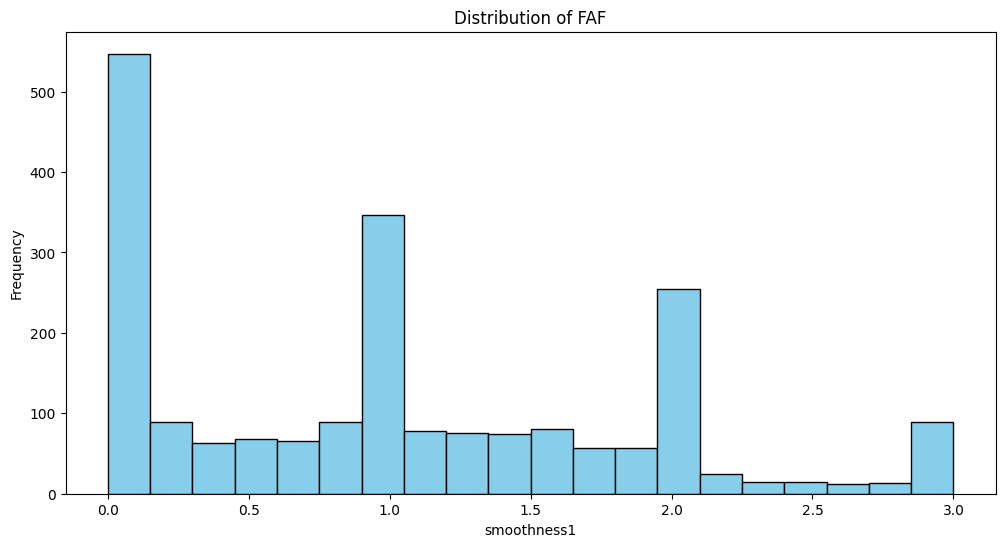

In [74]:
# Plot histograms for FAF
plt.figure(figsize=(12, 6))

plt.hist(df['FAF'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of FAF')
plt.xlabel('smoothness1')
plt.ylabel('Frequency')

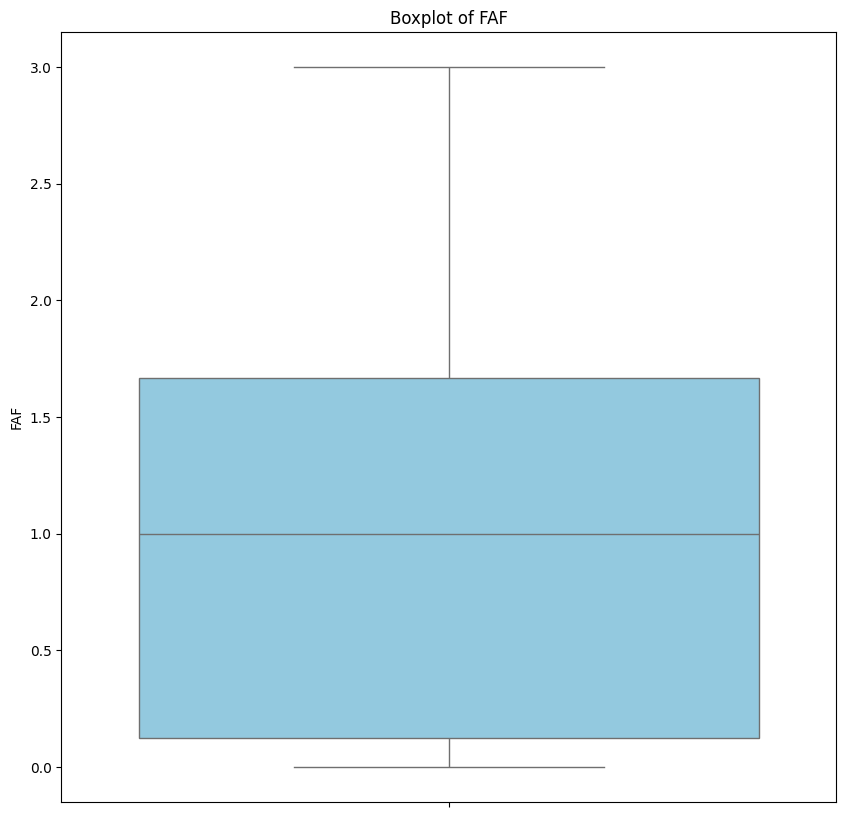

In [75]:
# Plot boxplot for FAF
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['FAF'], color='skyblue')
plt.title('Boxplot of FAF')
plt.ylabel('FAF')
plt.show()

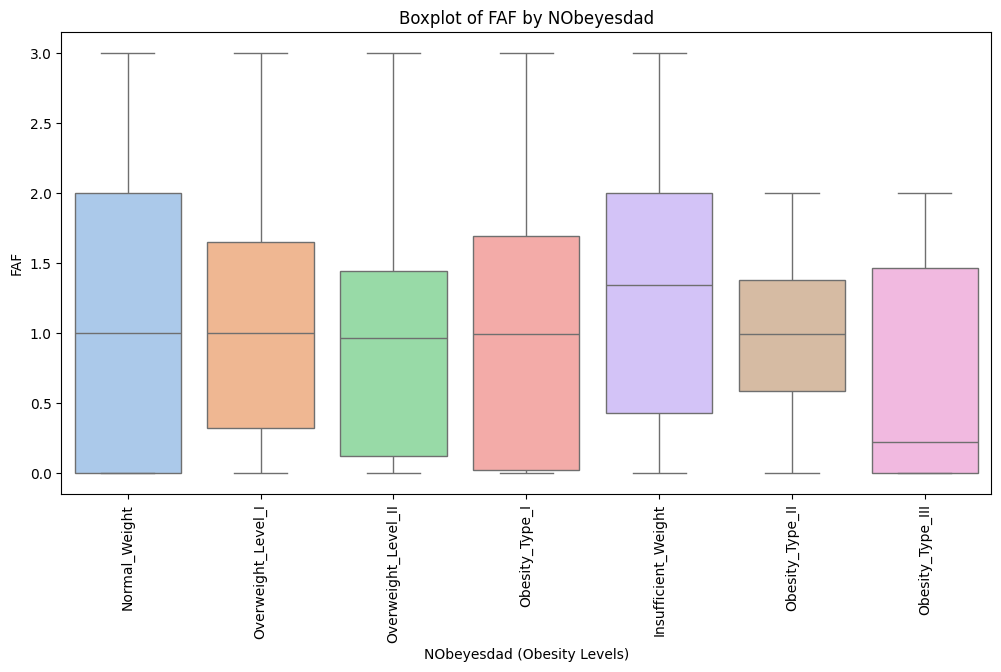

In [76]:
# Boxplot for FAF against NObeyesdad to show the distribution of FAF across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='FAF', data=df, palette='pastel')
plt.title('Boxplot of FAF by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FAF')
plt.xticks(rotation = 90)
plt.show()

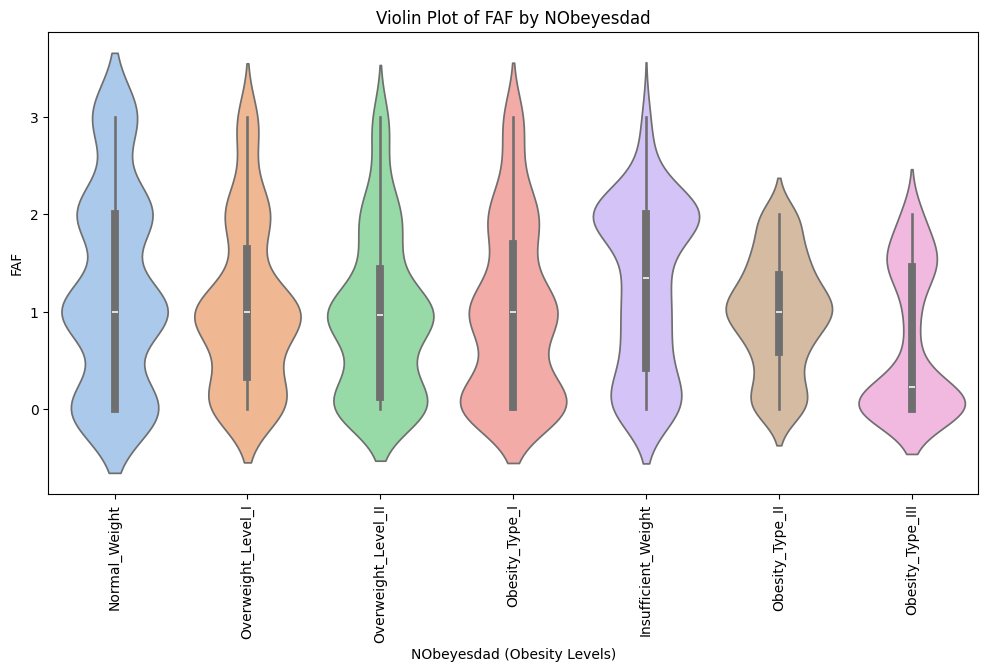

In [77]:
# Violin plot for 'FAF' against 'NObeyesdad' to show the distribution of FAF across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='FAF', data=df, palette='pastel')
plt.title('Violin Plot of FAF by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FAF')
plt.xticks(rotation = 90)
plt.show()

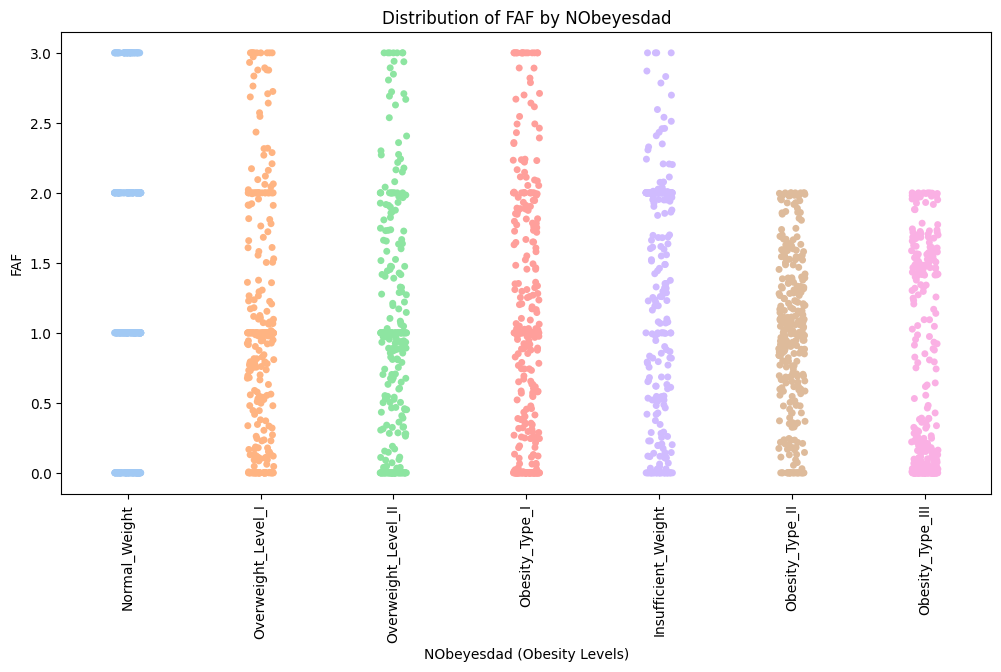

In [78]:
# Strip plot for 'FAF' against 'NObeyesdad' to show the distribution of FAF across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='FAF', data=df, palette='pastel', jitter=True)
plt.title('Distribution of FAF by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('FAF')
plt.xticks(rotation= 90)
plt.show()

###TUE

Text(0, 0.5, 'Frequency')

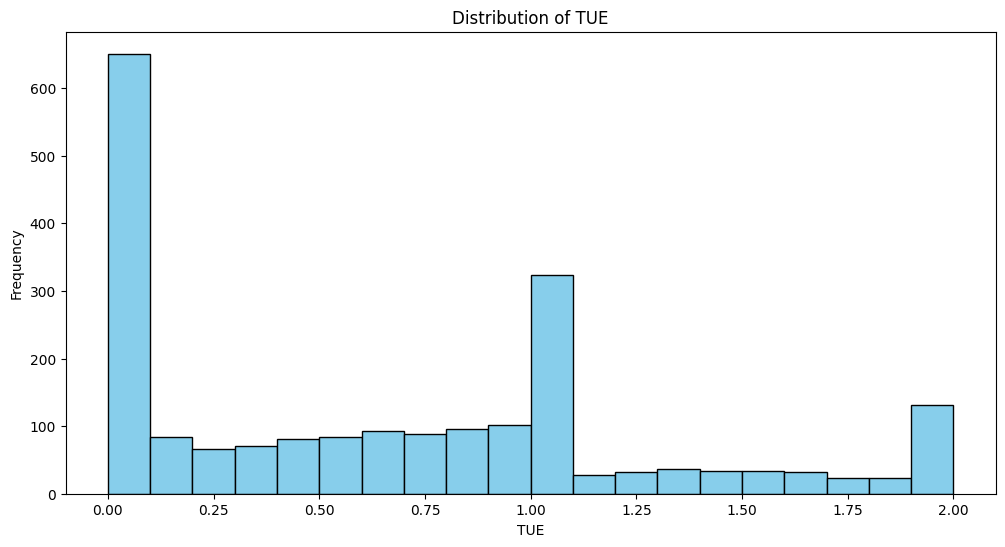

In [79]:
# Plot histograms for TUE
plt.figure(figsize=(12, 6))

plt.hist(df['TUE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TUE')
plt.xlabel('TUE')
plt.ylabel('Frequency')

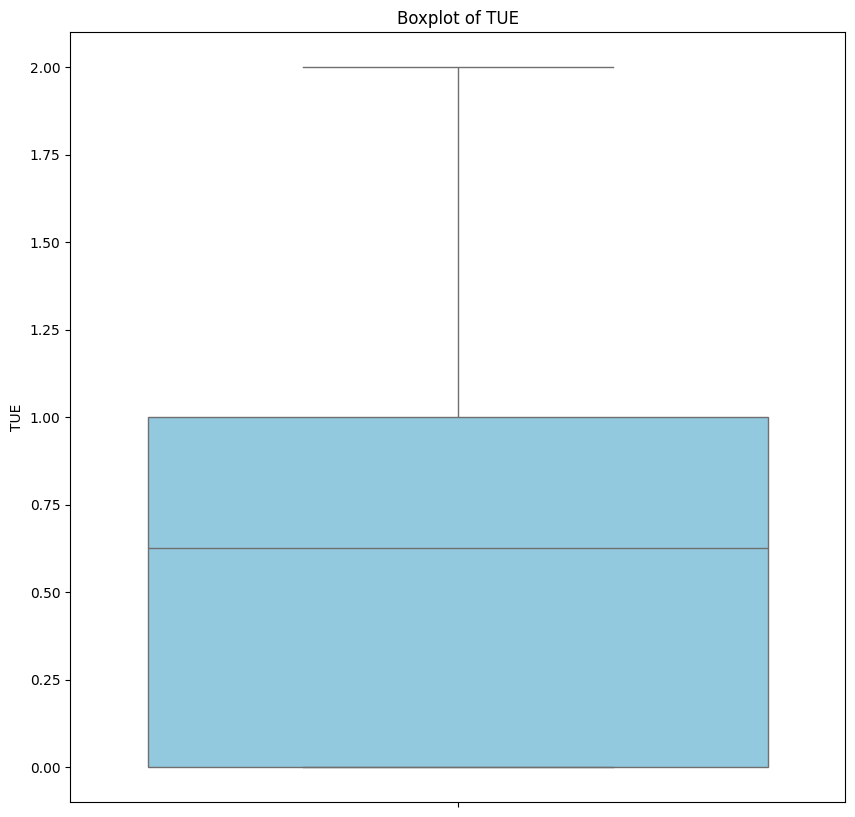

In [80]:
# Plot boxplot for TUE
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['TUE'], color='skyblue')
plt.title('Boxplot of TUE')
plt.ylabel('TUE')
plt.show()

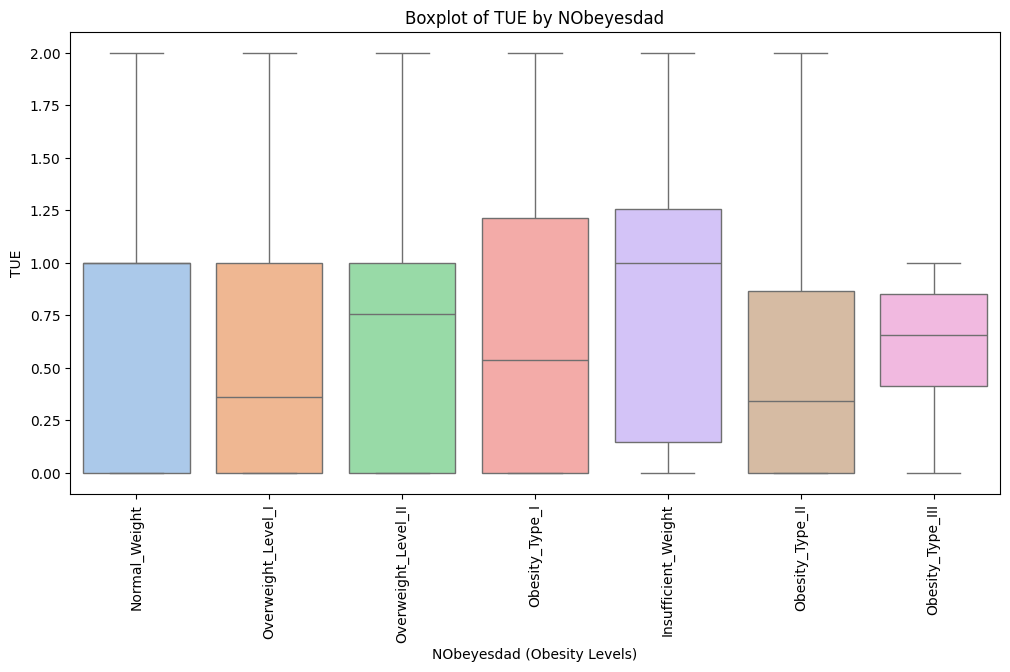

In [81]:
# Boxplot for TUE against NObeyesdad to show the distribution of TUE across different obesity levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='TUE', data=df, palette='pastel')
plt.title('Boxplot of TUE by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('TUE')
plt.xticks(rotation = 90)
plt.show()

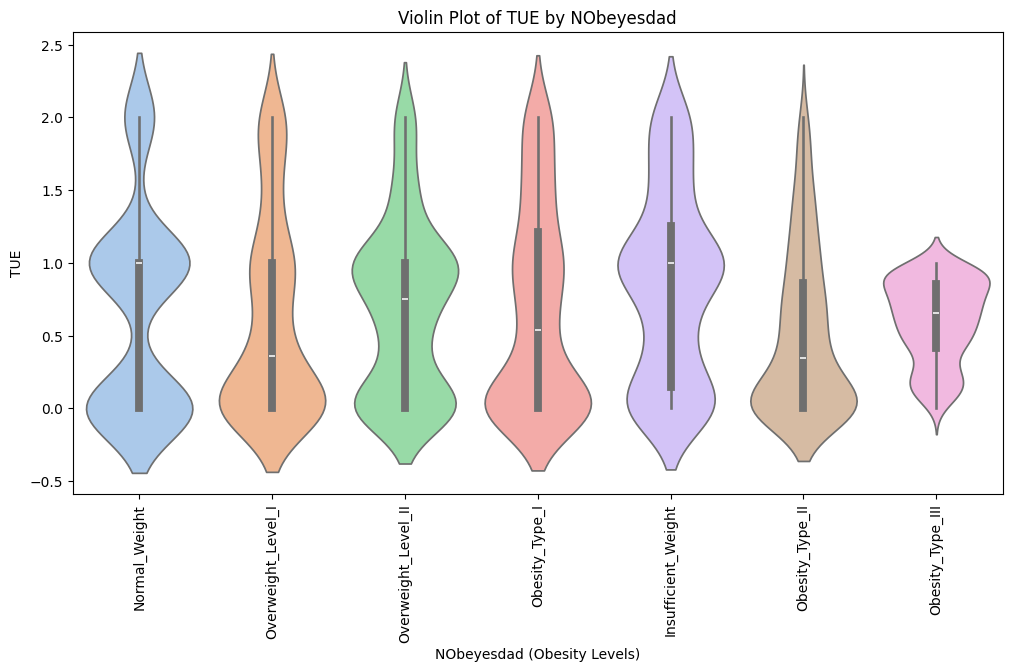

In [82]:
# Violin plot for 'TUE' against 'NObeyesdad' to show the distribution of TUE across different obesity levels
plt.figure(figsize=(12, 6))
sns.violinplot(x='NObeyesdad', y='TUE', data=df, palette='pastel')
plt.title('Violin Plot of TUE by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('TUE')
plt.xticks(rotation = 90)
plt.show()

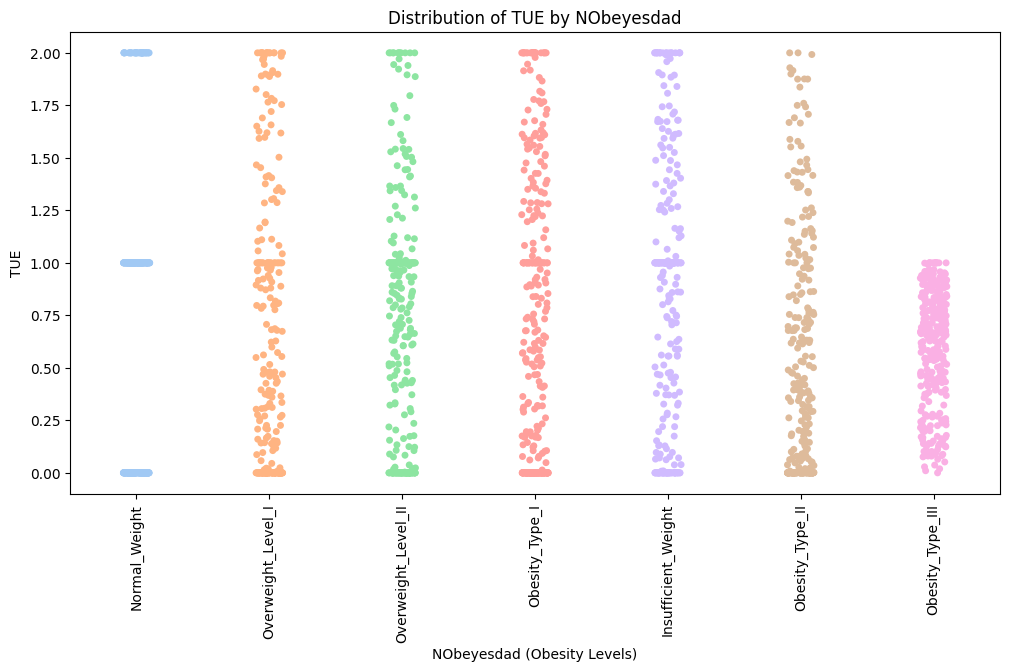

In [83]:
# Strip plot for 'TUE' against 'NObeyesdad' to show the distribution of TUE across different obesity levels
plt.figure(figsize=(12, 6))
sns.stripplot(x='NObeyesdad', y='TUE', data=df, palette='pastel', jitter=True)
plt.title('Distribution of TUE by NObeyesdad')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('TUE')
plt.xticks(rotation= 90)
plt.show()

###CALC

In [84]:
# Counting the occurrences of each value in the 'CALC' column
CALC_counts = df['CALC'].value_counts()
CALC_counts

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

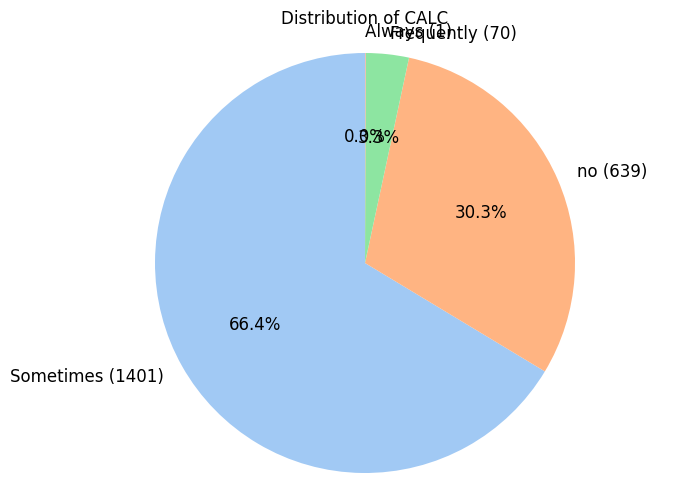

In [85]:
# Counting the occurrences of each value in the 'CALC' column
CALC_counts = df['CALC'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    CALC_counts,
    labels=[f"{label} ({count})" for label, count in zip(CALC_counts.index, CALC_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of CALC')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [86]:
# Creating a cross-tabulation table of counts for 'CALC' against 'NObeyesdad'
CALC_nobeyesdad_counts = pd.crosstab(df['CALC'], df['NObeyesdad'])
CALC_nobeyesdad_counts

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
CALC                                                             
Always                        0              1               0   
Frequently                    1             18              14   
Sometimes                   154            161             172   
no                          117            107             165   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
CALC                                                                
Always                    0                 0                   0   
Frequently                2                 0                  16   
Sometimes               224               323                 224   
no                       71                 1                  50   

NObeyesdad  Overweight_Level_II  
CALC                             
Always                        0  
Frequently                   19  
Sometimes                   143  
no                          128

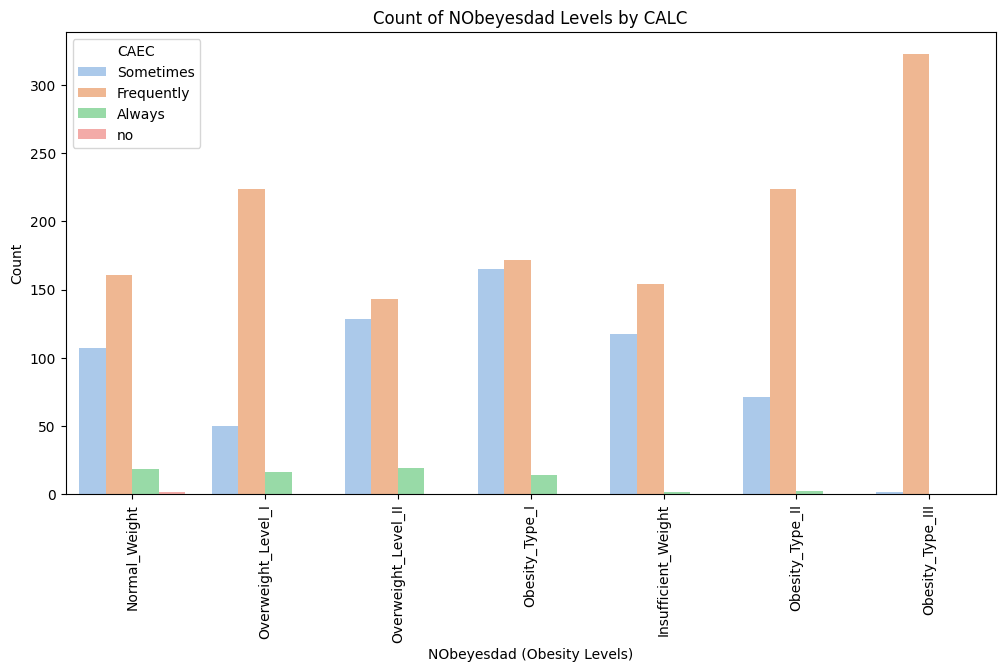

In [87]:
# Count plot for CALC against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='CALC', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by CALC')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='CAEC', labels=['Sometimes', 'Frequently', 'Always', 'no'])  # Adjusting labels based on encoding
plt.show()

###MTRANS

In [88]:
# Counting the occurrences of each value in the 'MTRANS' column
MTRANS_counts = df['MTRANS'].value_counts()
MTRANS_counts

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

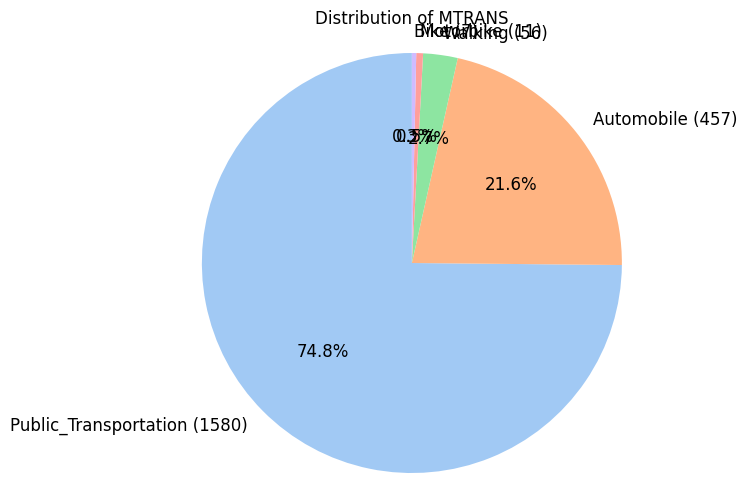

In [89]:
# Counting the occurrences of each value in the 'MTRANS' column
MTRANS_counts = df['MTRANS'].value_counts()

# Plotting the pie chart without encoding assumptions
plt.figure(figsize=(8, 6))
plt.pie(
    MTRANS_counts,
    labels=[f"{label} ({count})" for label, count in zip(MTRANS_counts.index, MTRANS_counts)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of MTRANS')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

In [90]:
# Creating a cross-tabulation table of counts for 'MTRANS' against 'NObeyesdad'
MTRANS_nobeyesdad_counts = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
MTRANS_nobeyesdad_counts

NObeyesdad             Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
MTRANS                                                                      
Automobile                              46             45             110   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  220            200             236   
Walking                                  6             32               2   

NObeyesdad             Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
MTRANS                                                                         
Automobile                          95                 1                  66   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200               323                 212   
Walking                              1                 0                   9   

NObeyesdad             Overweight_Level_II  
MTRANS                                      
Automobile                              94  
Bike                                     0  
Motorbike                                1  
Public_Transportation                  189  
Walking                                  6

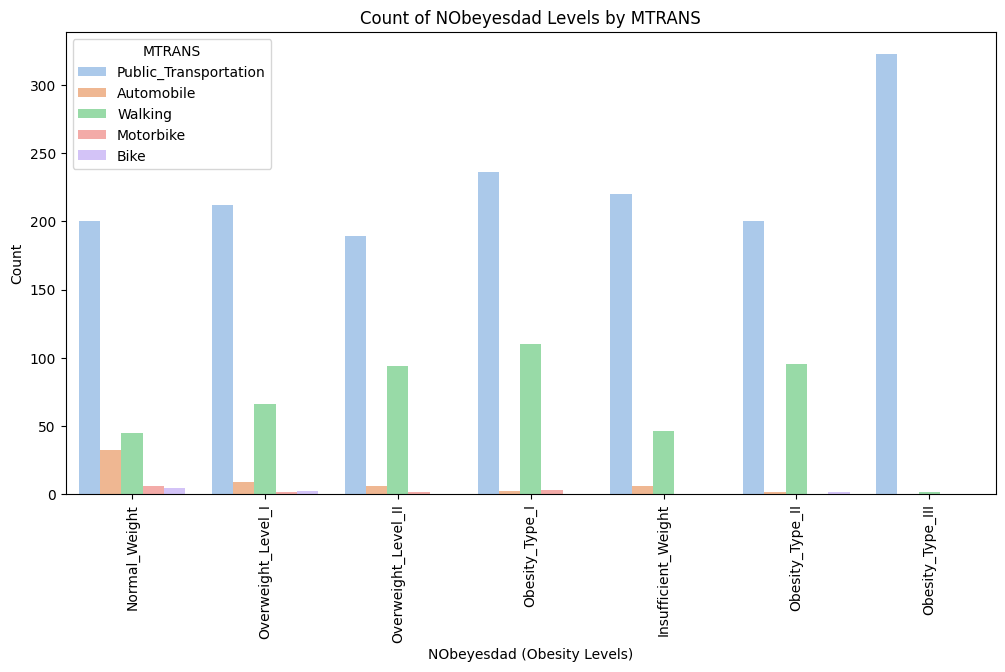

In [91]:
# Count plot for MTRANS against NObeyesdad
plt.figure(figsize=(12, 6))
sns.countplot(x='NObeyesdad', hue='MTRANS', data=df, palette='pastel')
plt.title('Count of NObeyesdad Levels by MTRANS')
plt.xlabel('NObeyesdad (Obesity Levels)')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title='MTRANS', labels=['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'])  # Adjusting labels based on encoding
plt.show()

###Correlation Heatmap

In [92]:
# Encode categorical variables including the target variable
label_encoders = {}
for column in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Encode the target variable
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

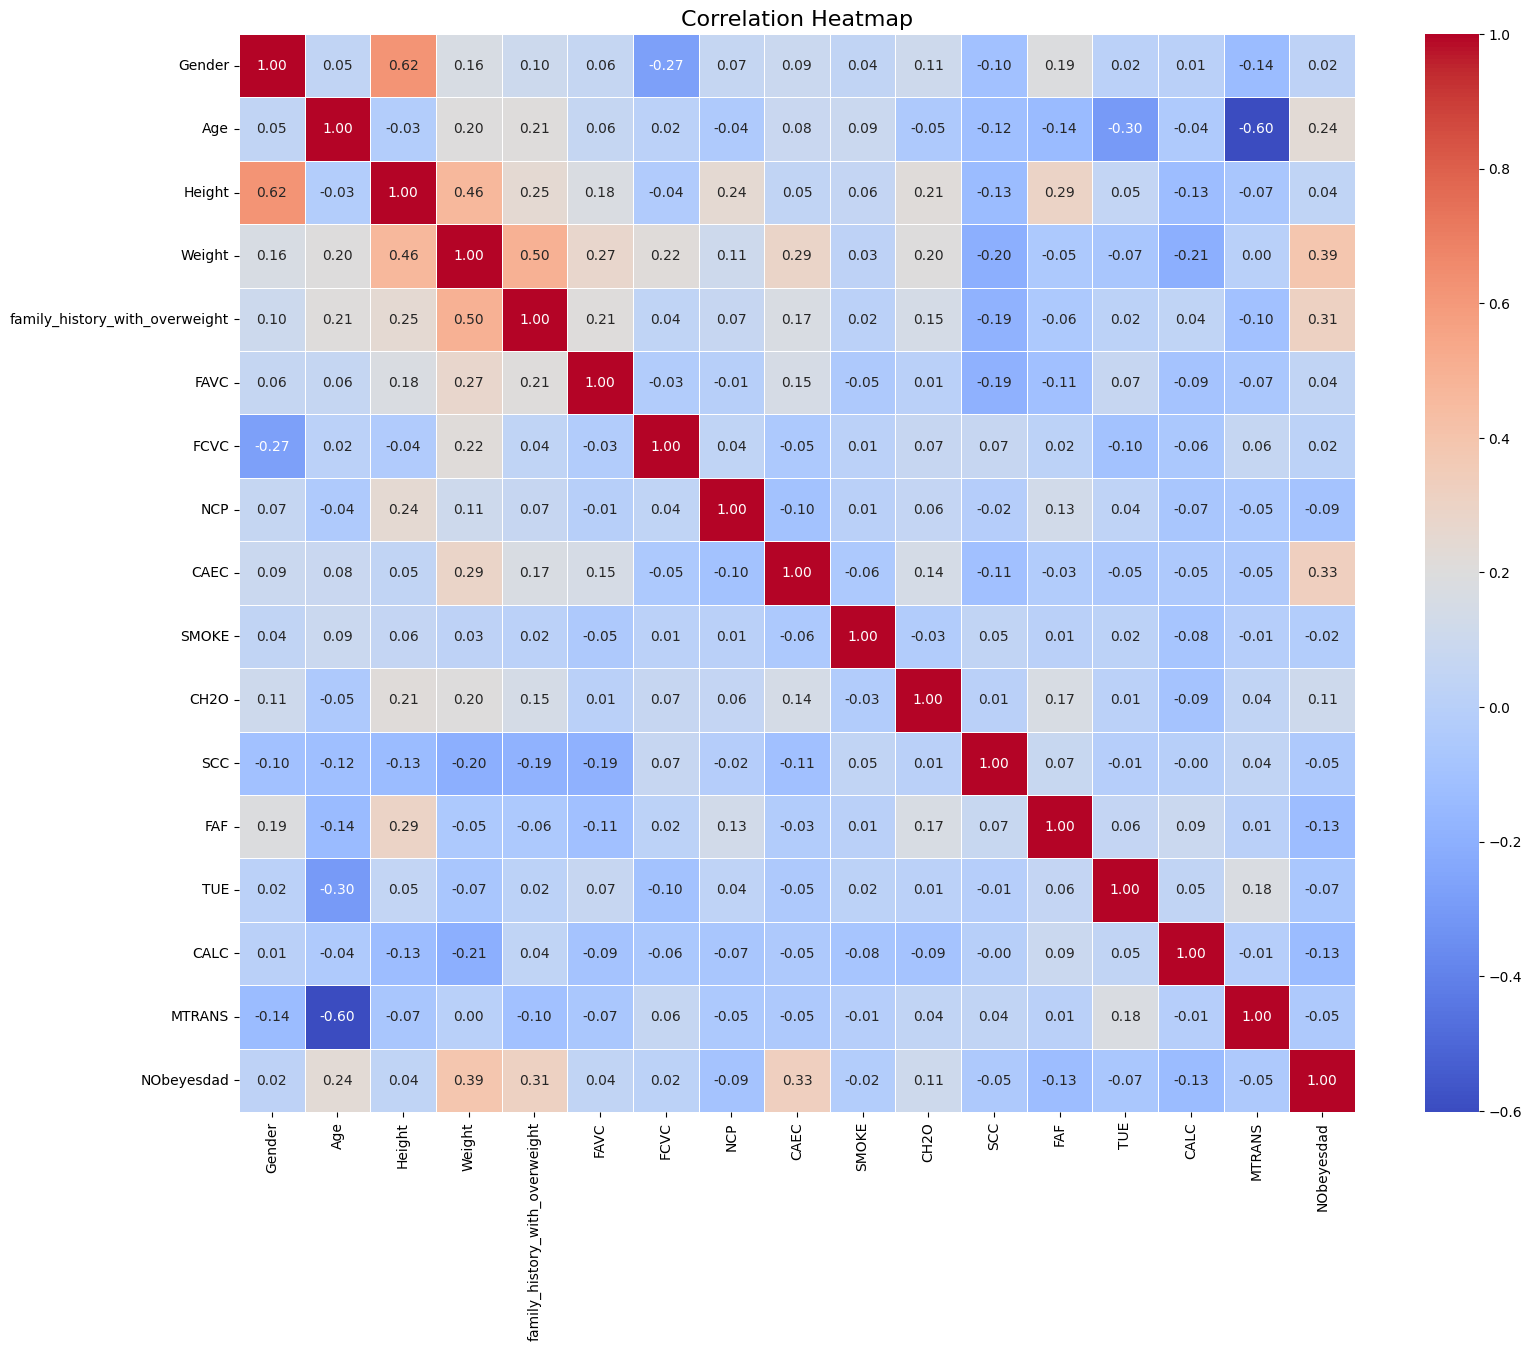

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix on the encoded DataFrame
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

###Correlation All Features Vs. NObeyesdad

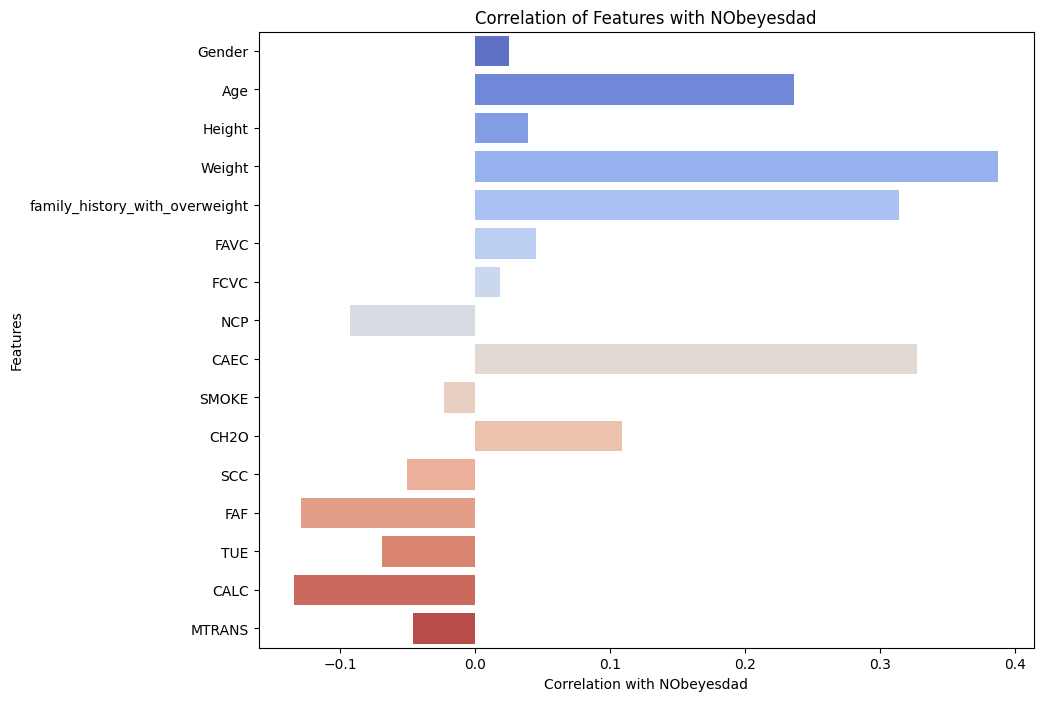

In [94]:
# Calculate the correlation between all features and the NObeyesdad
corr_with_NObeyesdad = df.corr()['NObeyesdad'].drop('NObeyesdad')  # Exclude self-correlation

# Plotting the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_NObeyesdad.values, y=corr_with_NObeyesdad.index, palette='coolwarm')

# Add labels and title
plt.xlabel('Correlation with NObeyesdad')
plt.ylabel('Features')
plt.title('Correlation of Features with NObeyesdad')
plt.show()

###NObeyesdad(Target Variable)

In [95]:
df['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

| NObeyesdad           | Value Count | Label     |
|----------------------|-------------|-----------|
| Obesity_Type_I       | 351         | 2         |
| Obesity_Type_III     | 324         | 4         |
| Obesity_Type_II      | 297         | 3         |
| Overweight_Level_I   | 290         | 5         |
| Overweight_Level_II  | 290         | 6         |
| Normal_Weight        | 287         | 1         |
| Insufficient_Weight  | 272         | 0         |


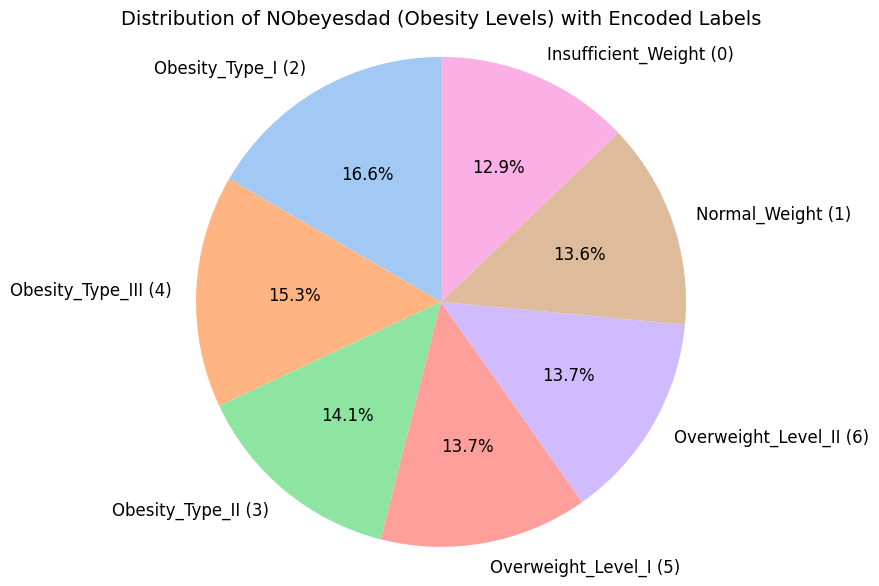

In [96]:
# Retrieve the value counts of the encoded 'NObeyesdad' from the dataframe
target_counts = df['NObeyesdad'].value_counts()

# Corresponding labels for the pie chart
target_labels = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II',
                 'Overweight_Level_I', 'Overweight_Level_II',
                 'Normal_Weight', 'Insufficient_Weight']

# Mapping encoded labels back to their original names with their corresponding values
encoded_labels = ['2', '4', '3', '5', '6', '1', '0']

# Plotting the pie chart for the provided data
plt.figure(figsize=(10, 7))
plt.pie(
    target_counts.values,
    labels=[f"{name} ({label})" for name, label in zip(target_labels, encoded_labels)],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title('Distribution of NObeyesdad (Obesity Levels) with Encoded Labels', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

##5.Predictive Modeling

###Model Training

####Data Preparating

In [97]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [98]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

In [99]:
# Define features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [100]:
y.value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####Model Selection and Training

In [103]:
# List of models to train, including SVC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(verbose=0, random_state=42),
    "LogitBoost": LogitBoost(),
    "SVC": SVC(probability=True, random_state=42)  # SVC added to the model list
}

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test, target_encoder):
    results = {}
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        predictions[name] = y_pred

        print(f"{name} results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}\n")

        # Confusion matrix with original labels
        cm = confusion_matrix(y_test, y_pred)
        cm_labels = target_encoder.inverse_transform(range(len(target_encoder.classes_)))

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(rotation= 90)
        plt.yticks(rotation= 360)
        plt.show()

    return results, predictions

###Model Evaluation

Logistic Regression results:
Accuracy: 0.8747
Precision: 0.8715
Recall: 0.8740
F1 Score: 0.8675



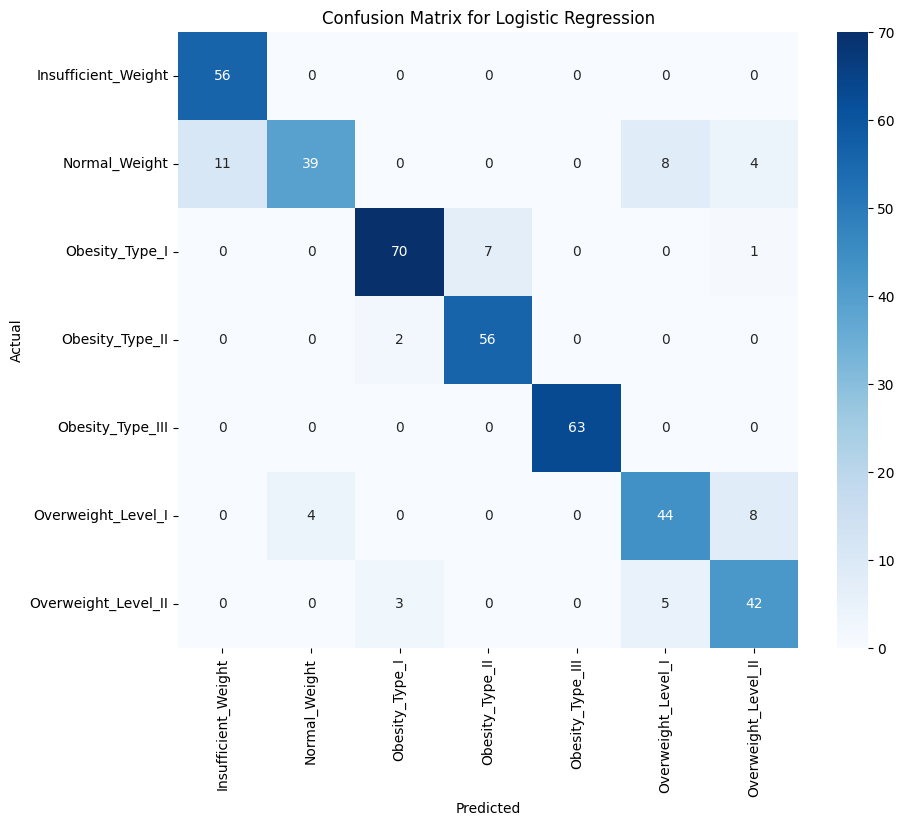

Decision Tree results:
Accuracy: 0.9338
Precision: 0.9335
Recall: 0.9345
F1 Score: 0.9338



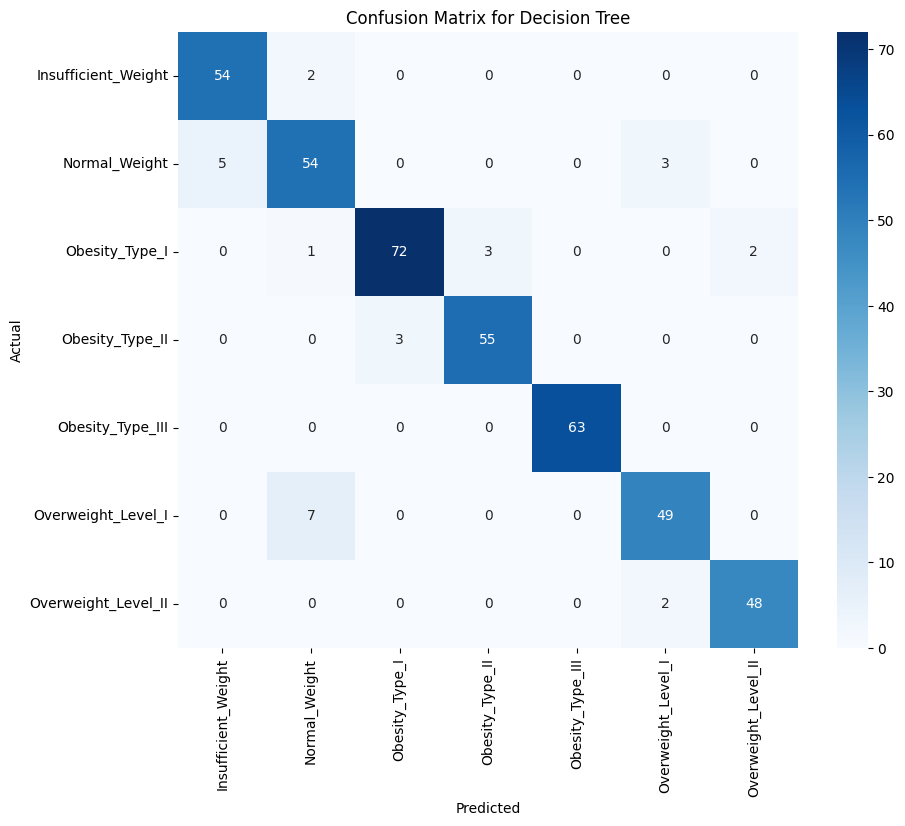

Random Forest results:
Accuracy: 0.9551
Precision: 0.9544
Recall: 0.9539
F1 Score: 0.9541



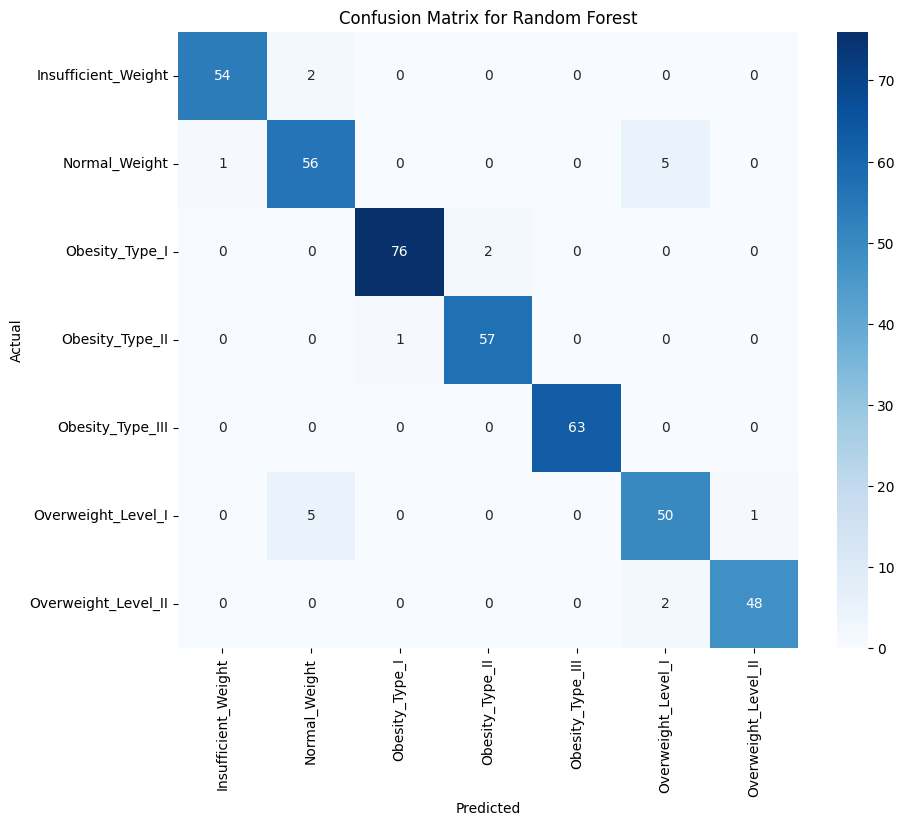

AdaBoost results:
Accuracy: 0.2695
Precision: 0.3681
Recall: 0.2680
F1 Score: 0.2094



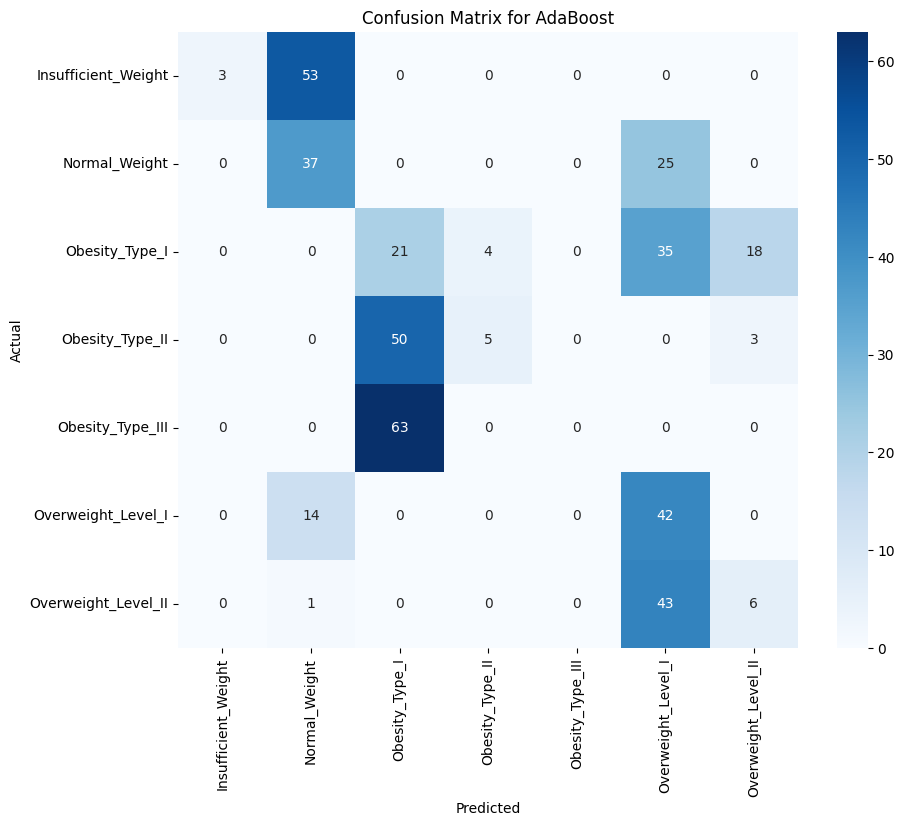

Gradient Boosting results:
Accuracy: 0.9527
Precision: 0.9517
Recall: 0.9553
F1 Score: 0.9525



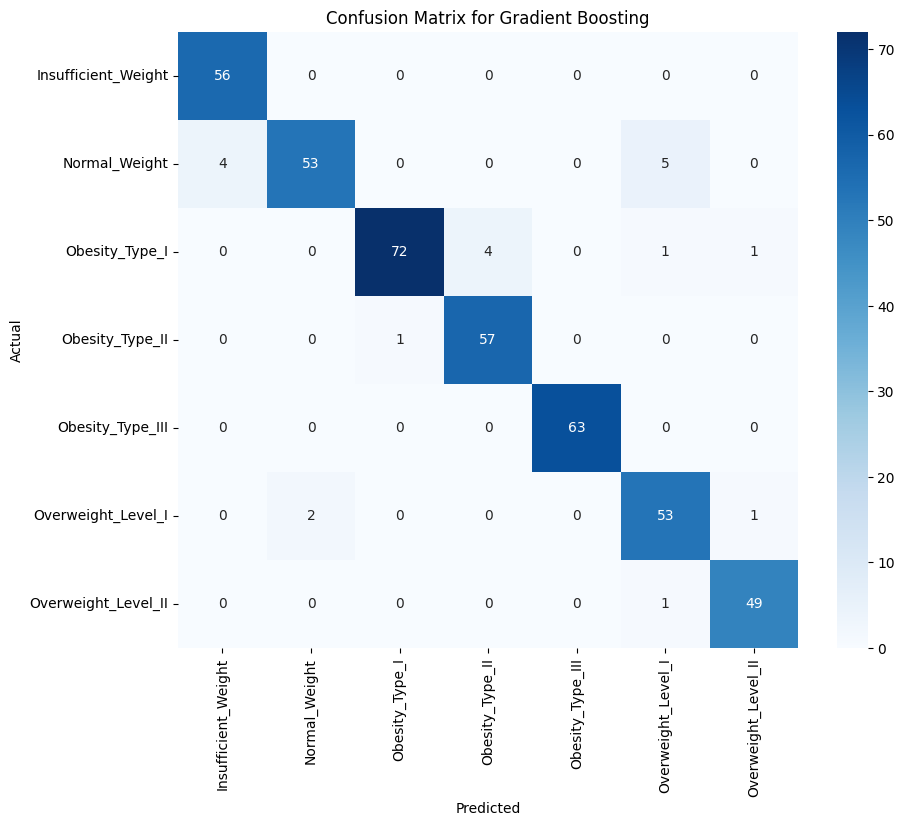

XGBoost results:
Accuracy: 0.9622
Precision: 0.9621
Recall: 0.9629
F1 Score: 0.9622



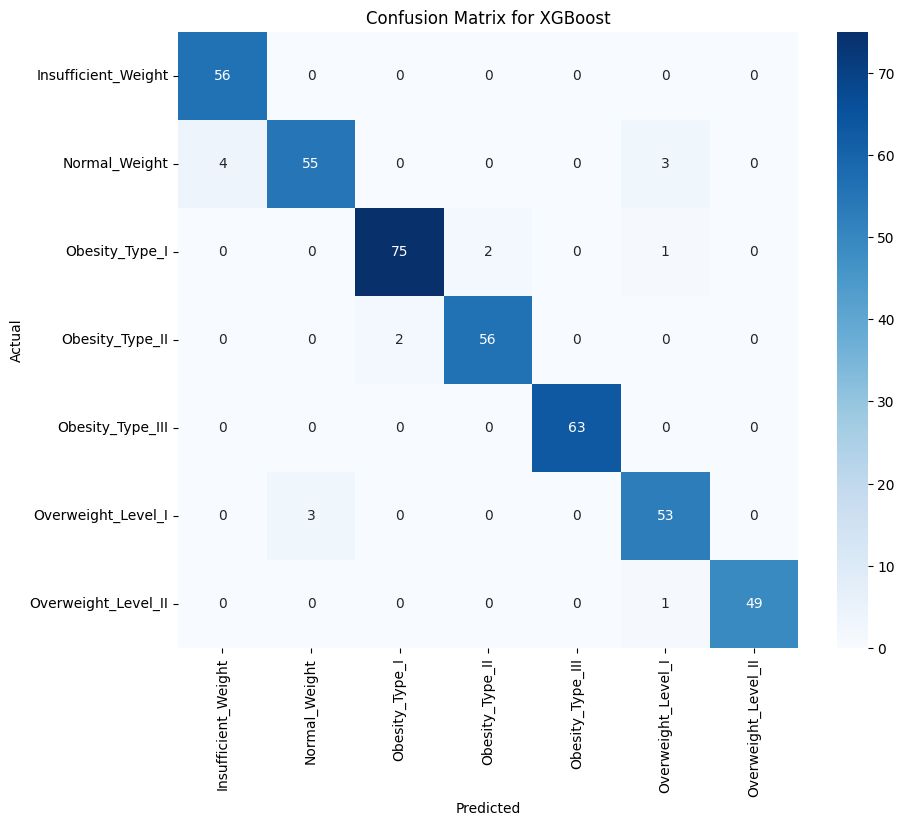

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2068
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

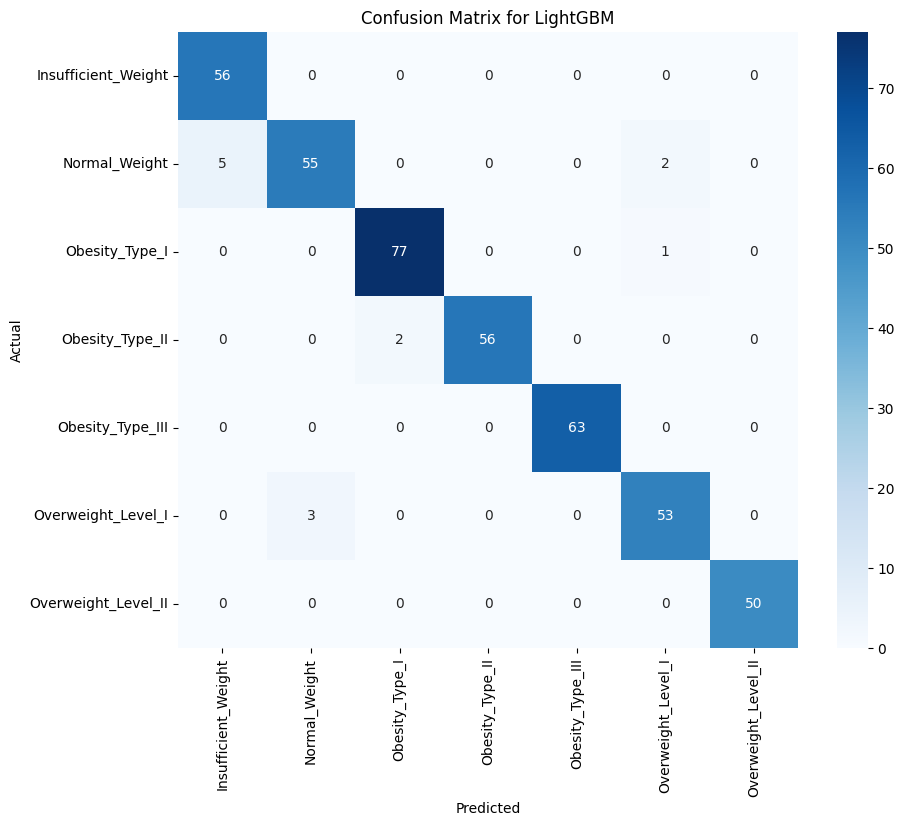

CatBoost results:
Accuracy: 0.9622
Precision: 0.9630
Recall: 0.9621
F1 Score: 0.9621



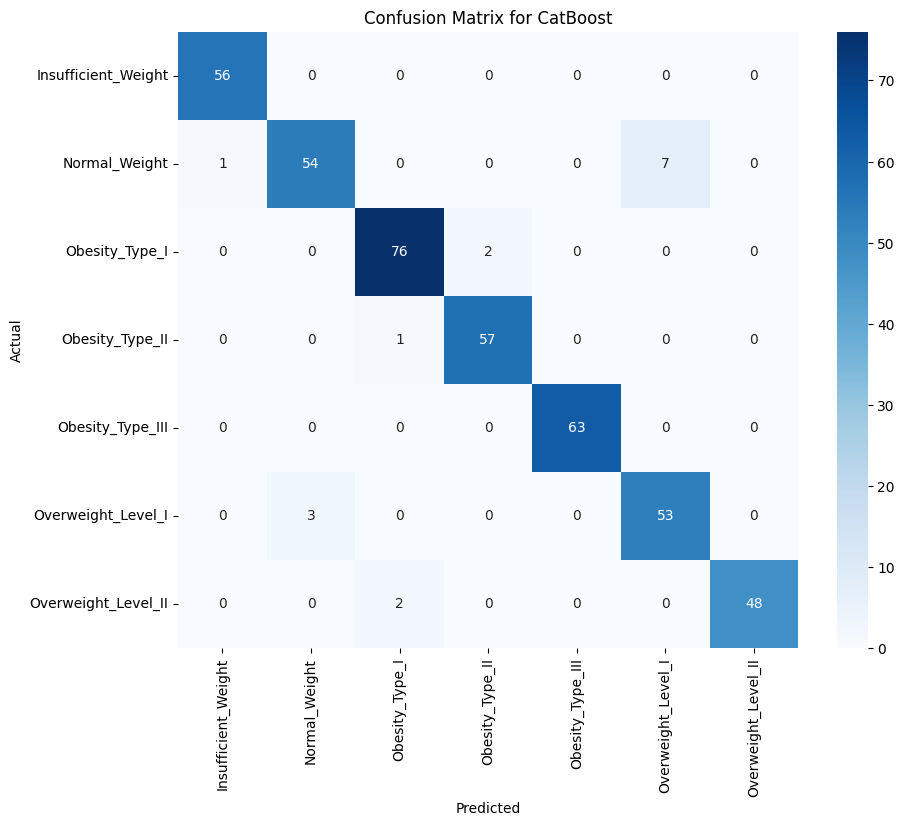

LogitBoost results:
Accuracy: 0.9314
Precision: 0.9292
Recall: 0.9312
F1 Score: 0.9293



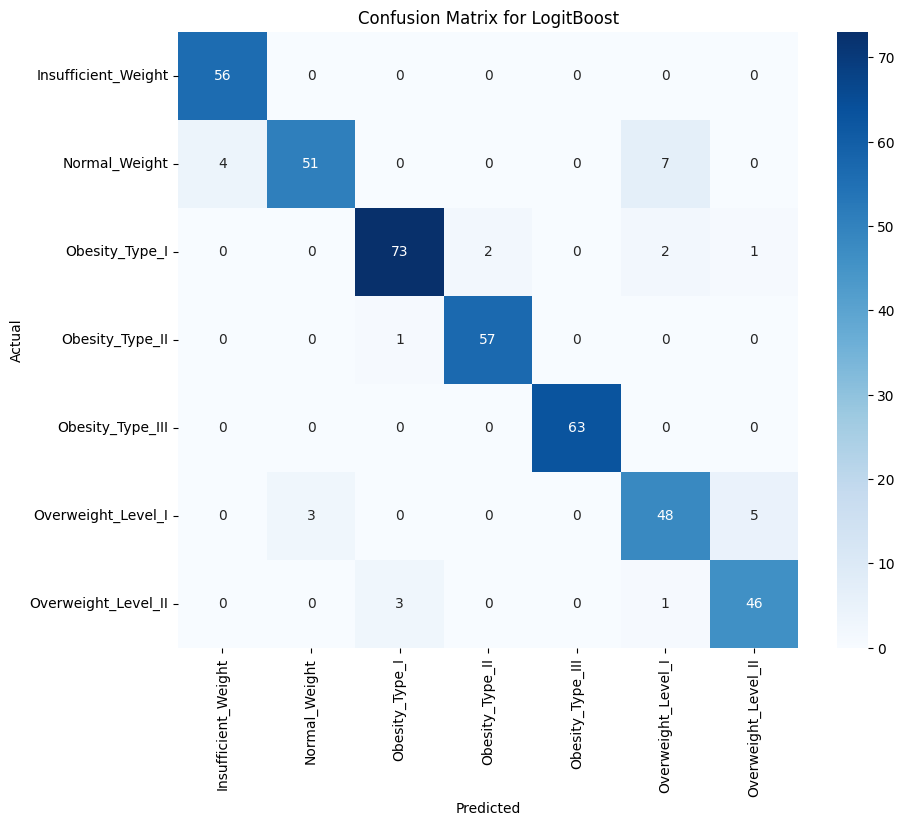

SVC results:
Accuracy: 0.8889
Precision: 0.8875
Recall: 0.8857
F1 Score: 0.8857



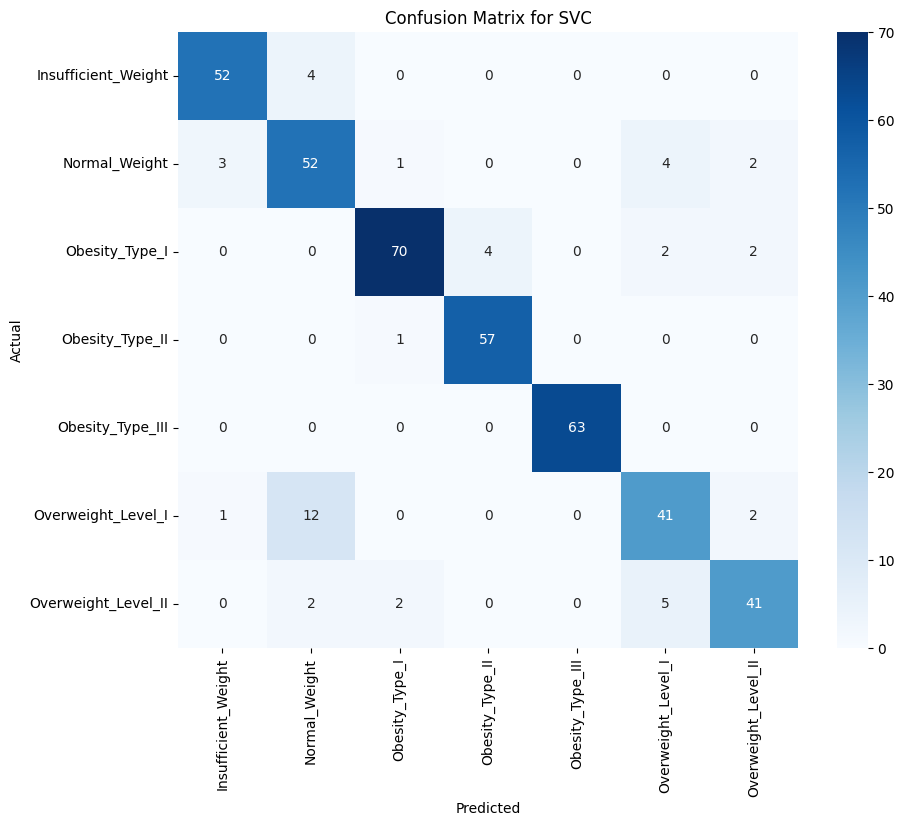

In [105]:
# Train and evaluate the models
results, predictions = train_and_evaluate(models, X_train, X_test, y_train, y_test,target_encoder)

In [106]:
# Display results in a table format
results_df = pd.DataFrame(results)
results_df

Logistic Regression  Decision Tree  Random Forest  AdaBoost  \
accuracy              0.874704       0.933806       0.955083  0.269504   
precision             0.871512       0.933527       0.954372  0.368076   
recall                0.873957       0.934515       0.953927  0.267969   
f1_score              0.867549       0.933805       0.954090  0.209419   

           Gradient Boosting   XGBoost  LightGBM  CatBoost  LogitBoost  \
accuracy            0.952719  0.962175  0.969267  0.962175    0.931442   
precision           0.951688  0.962135  0.969632  0.963041    0.929162   
recall              0.955300  0.962940  0.969460  0.962073    0.931197   
f1_score            0.952459  0.962167  0.969101  0.962087    0.929313   

                SVC  
accuracy   0.888889  
precision  0.887515  
recall     0.885660  
f1_score   0.885729

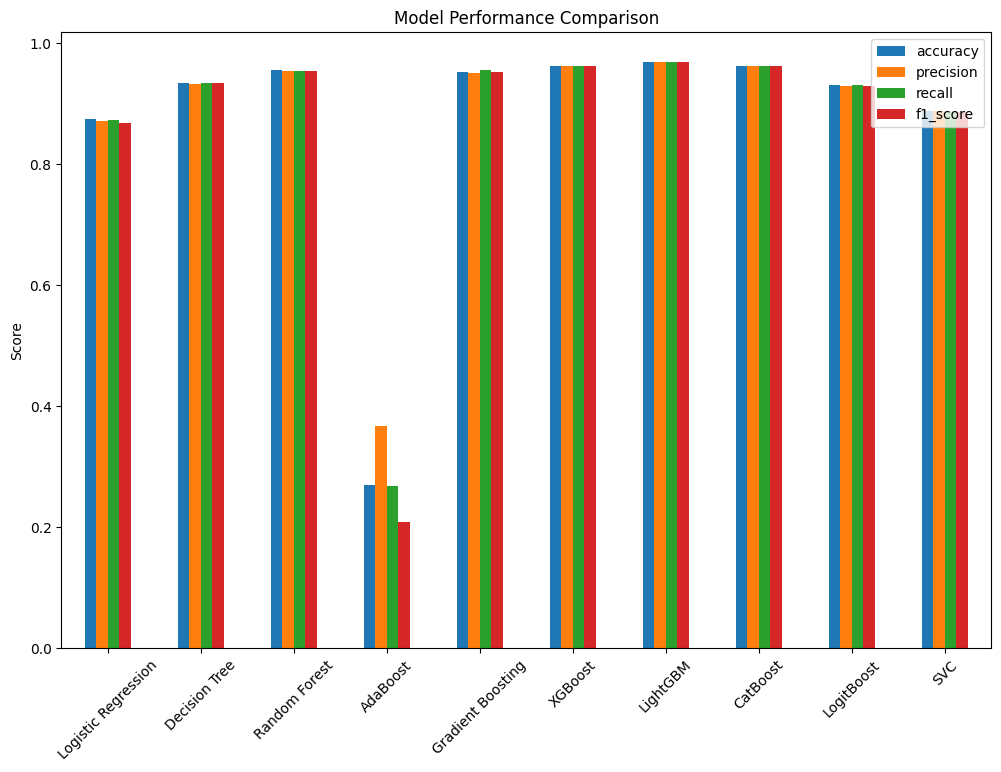

In [107]:
# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

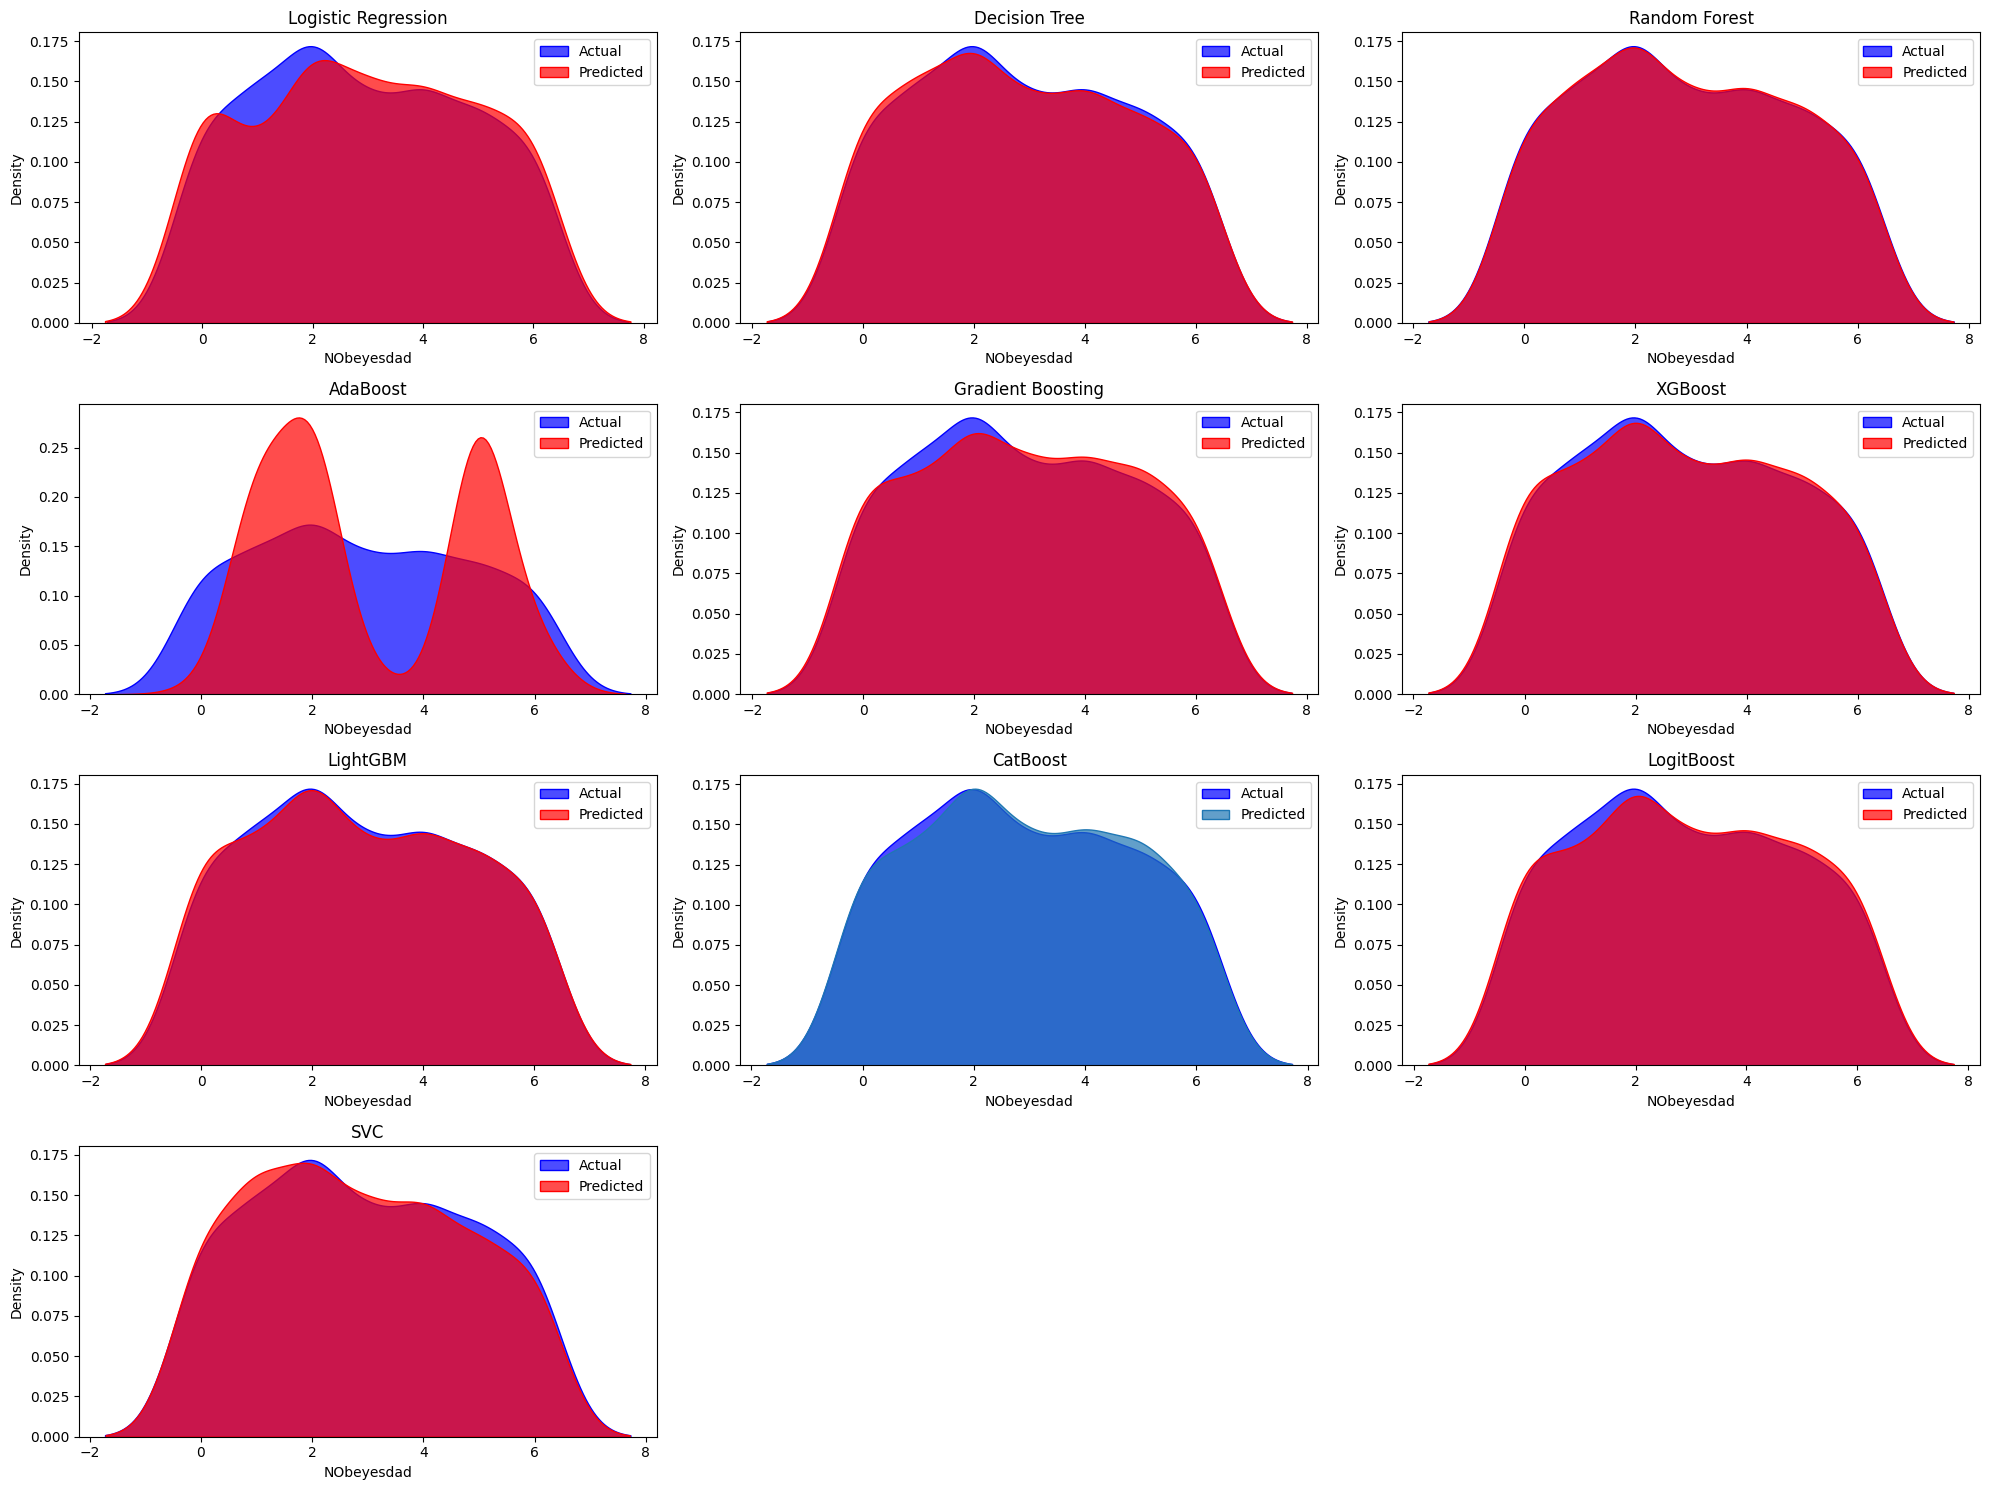

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 4x3 grid to accommodate up to 12 models
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

# Flatten the axes array for easy indexing
ax = ax.flatten()

model_names = list(models.keys())

# Loop through each model and plot the actual vs. predicted distributions
for i, name in enumerate(model_names):
    if i < len(ax):  # Ensure we do not exceed available axes
        # Plot actual vs predicted distributions with distinct colors and transparency
        sns.kdeplot(y_test, ax=ax[i], label='Actual', color='blue', alpha=0.7, fill=True)
        sns.kdeplot(predictions[name], ax=ax[i], label='Predicted', color='red', alpha=0.7, fill=True)
        ax[i].set_title(name)
        ax[i].legend()

# Hide any unused subplots (since we may have fewer models than grid slots)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


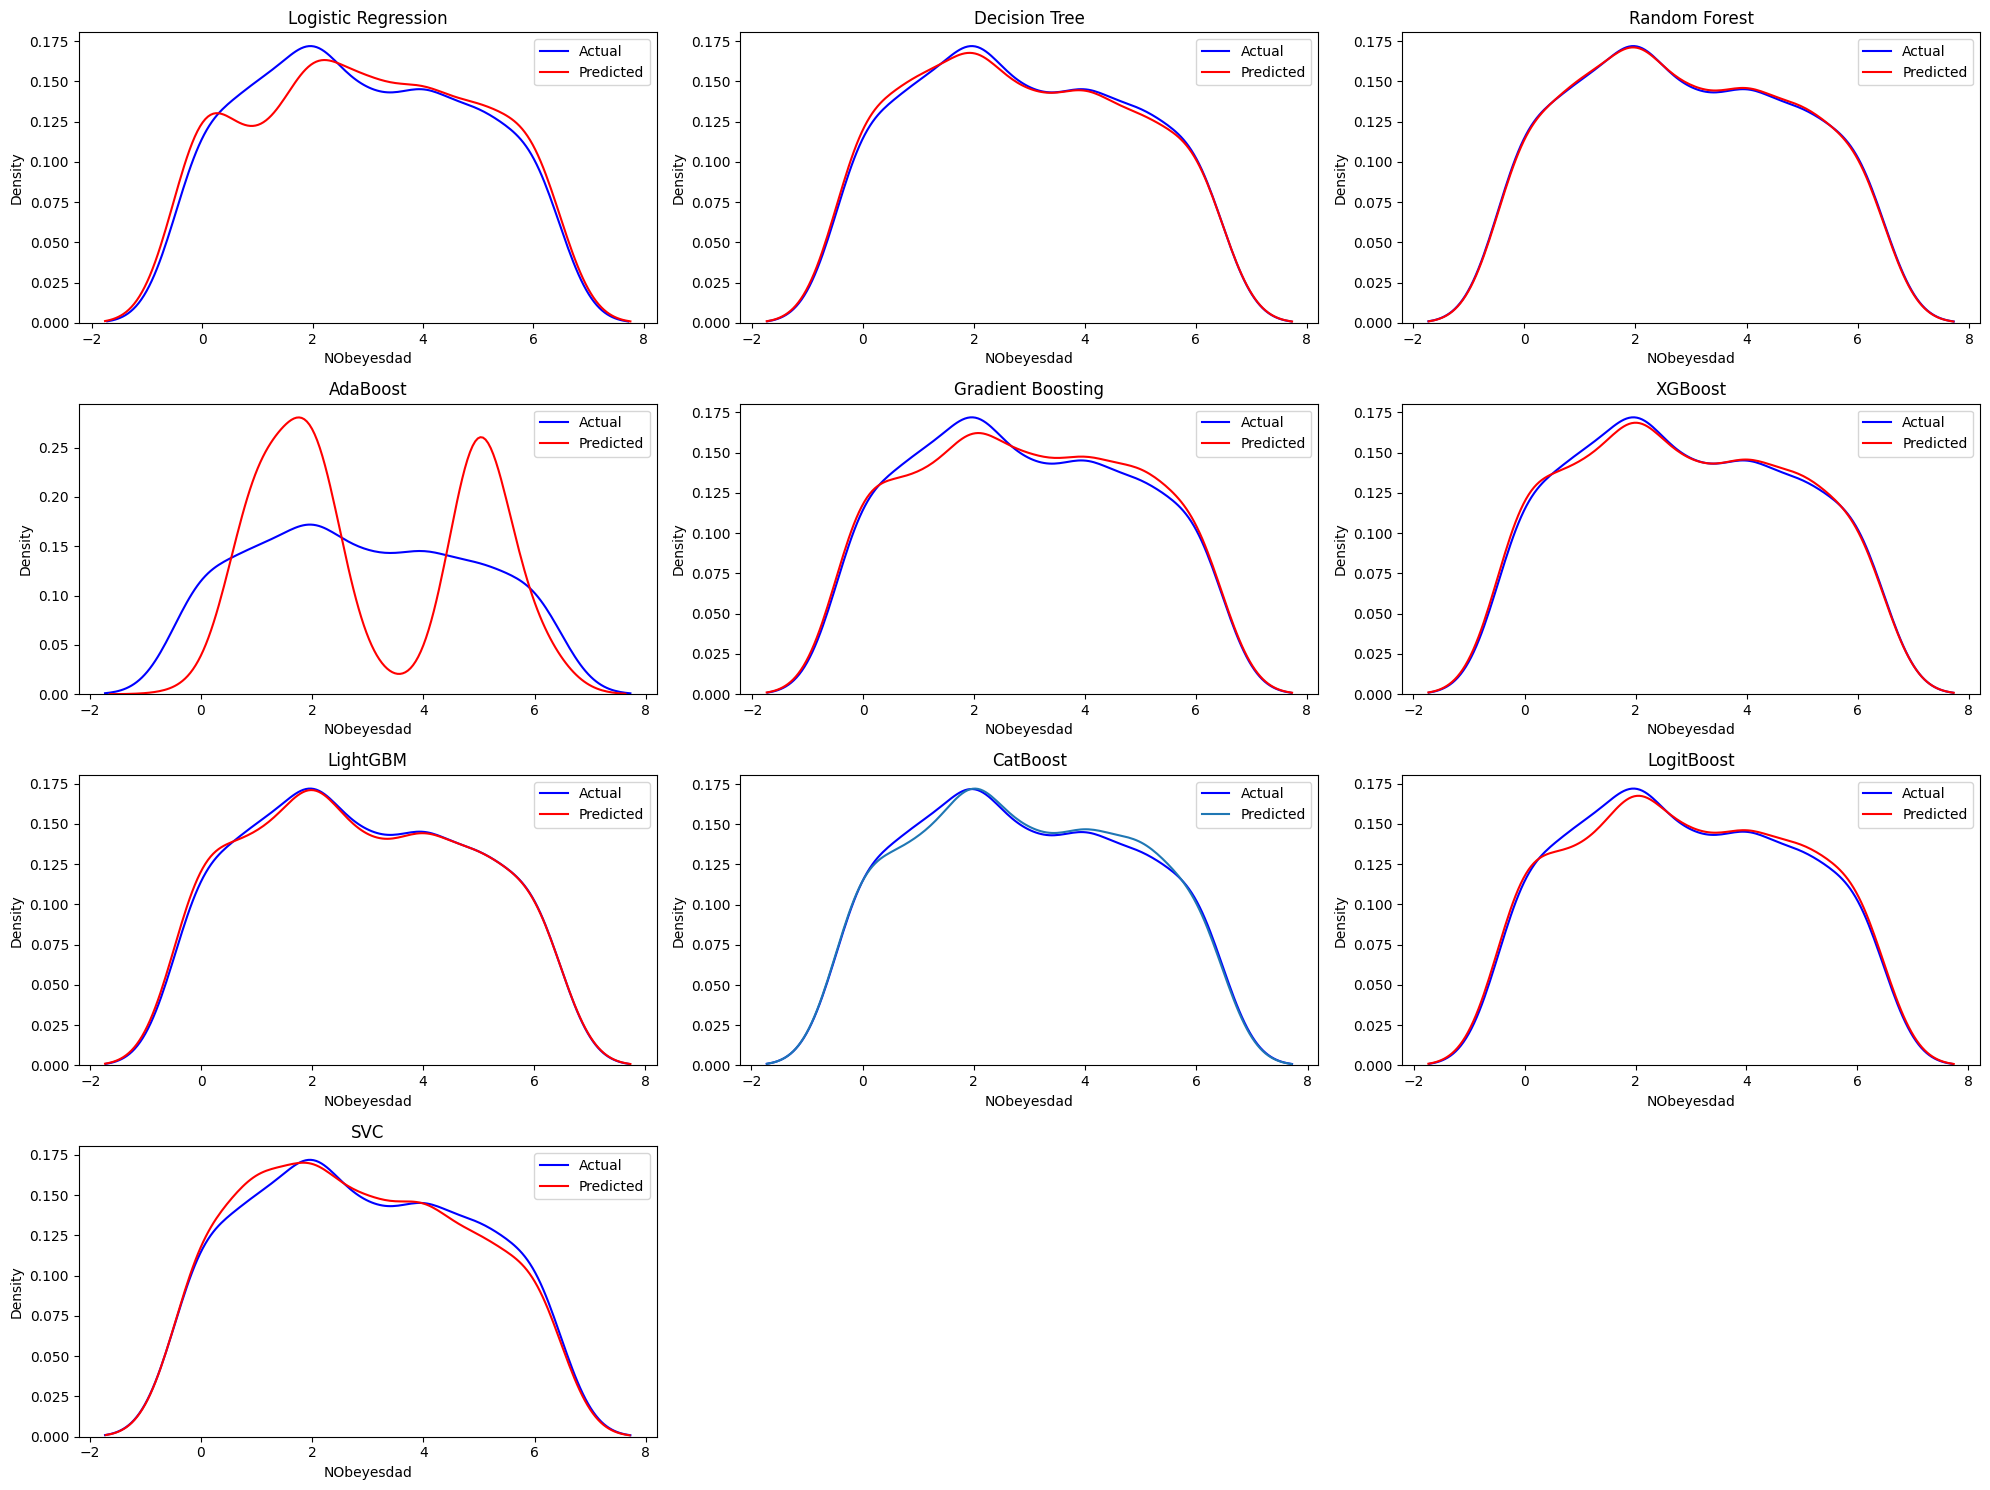

In [109]:
# Create a 4x3 grid to accommodate 10 models
fig, ax = plt.subplots(4, 3, figsize=(20, 15))

# Flatten the axes array for easy indexing
ax = ax.flatten()

model_names = list(models.keys())

# Loop through each model and plot the actual vs. predicted distributions
for i, name in enumerate(model_names):
    sns.kdeplot(y_test, ax=ax[i], label='Actual', color='blue')
    sns.kdeplot(predictions[name], ax=ax[i], label='Predicted', color='red')
    ax[i].set_title(name)
    ax[i].legend()

# Hide any unused subplots (since we only have 10 models but a 12 subplot grid)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

##6.Conclusion

**LightGBM** stands out as the top-performing model in your analysis, demonstrating superior performance across all key metrics:
* Accuracy: 0.969267
* Precision: 0.969632
* Recall: 0.969460
* F1 Score: 0.969101

These results indicate that **LightGBM** not only accurately predicts the outcomes but also maintains a balanced performance in terms of precision and recall, minimizing both false positives and false negatives effectively. This balanced performance leads to a high F1 score, reinforcing its reliability and robustness.